In [142]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/mnt/home/cmodi/miniconda3/envs/jaxenv/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['cov', 'axis', 'seed', 'mean', 'ndim']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# PDB figures

In [317]:

sys.path.append('/mnt/home/cmodi/Research/Projects/posterior_database/')
from posteriordb import BSDB
from jax_utils import jaxify_bs
from jax import jit



In [4]:
names = {11: 'bball_drive-hmm', 
         23: 'diamonds', 
         31: 'eight_schools_centered', 
         44: 'arK-arK', 
         48: 'low_dim_gauss_mix', 
         51: 'hudson_lynx_hare', 
         64: 'gp_pois_regr', 
        68: 'gp_pois_regr',
         85: 'eight_schools_noncentered'
        }


def setup_pdb(model_n):

    model = BSDB(model_n)
    D = model.dims
    lpjax, lp_itemjax = jaxify_bs(model)
    lp = model.lp
    lp_g = lambda x: model.lp_g(x)[1]
    lpjaxsum = jit(lambda x: jnp.mean(lpjax(x)))
    try:
        ref_samples = model.samples_unc.copy()
    except Exception as e:
        print(e)
        ref_samples = None

    return model, D, lpjaxsum, lp_g, ref_samples

nmodel = 68
model, D, lpjaxsum, lp_g, ref_samples = setup_pdb(nmodel)
print(D)

Model name : Model_68
13


In [5]:
model.samples.shape

(10000, 24)

In [20]:
samples;
reglist = ['$\lambda=$c', '$\lambda=$c/t', '$\lambda=$c/t**0.5']


In [175]:
# nmodel = 44

# lt = 0
# reg = 100
# seed = 0
# batch = 16 

# for seed in range(5):
#     path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}/S{seed}/'
#     nevals =  np.load(path + 'nevals.npy')
#     fkl =  np.load(path + 'fkl.npy')
#     rkl =  np.load(path + 'rkl.npy')
#     plt.plot(nevals, rkl, 'C0', alpha=0.7)
# plt.loglog()


# batch = 2
# for seed in range(5):
#     path = f'//mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{nmodel}/gsm-frg/B{batch:02d}/S{seed}/'
#     nevals =  np.load(path + 'counts.npy')
#     fkl =  np.load(path + 'fdivs.npy')[:, 0]*-1
#     rkl =  np.load(path + 'qdivs.npy')[:, 0]
#     plt.plot(nevals, rkl, 'C1', alpha=0.7)
# plt.loglog()


# batch = 2
# lr = 1e-2
# for seed in range(5):
#     path = f'//mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{nmodel}/bbvi-frg-full/B{batch:02d}-lr{lr:0.1e}/S{seed}/'
#     nevals =  np.load(path + 'counts.npy')
#     fkl =  np.load(path + 'fdivs.npy')[:, 0]*-1
#     rkl =  np.load(path + 'qdivs.npy')[:, 0]
#     plt.plot(nevals, rkl, 'C2', alpha=0.7)
# plt.loglog()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B2-lambdat0-reg100.00-modeinit/S0/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B2-lambdat0-reg100.00-modeinit/S1/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B2-lambdat0-reg100.00-modeinit/S2/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B2-lambdat0-reg100.00-modeinit/S3/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B2-lambdat0-reg100.00-modeinit/S4/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B2-lambdat1-reg0.10-modeinit/S0/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B2-lambdat1-reg0.10-modeinit/S1/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B2-lambdat1-reg0.10-modeinit/S2/nevals.npy

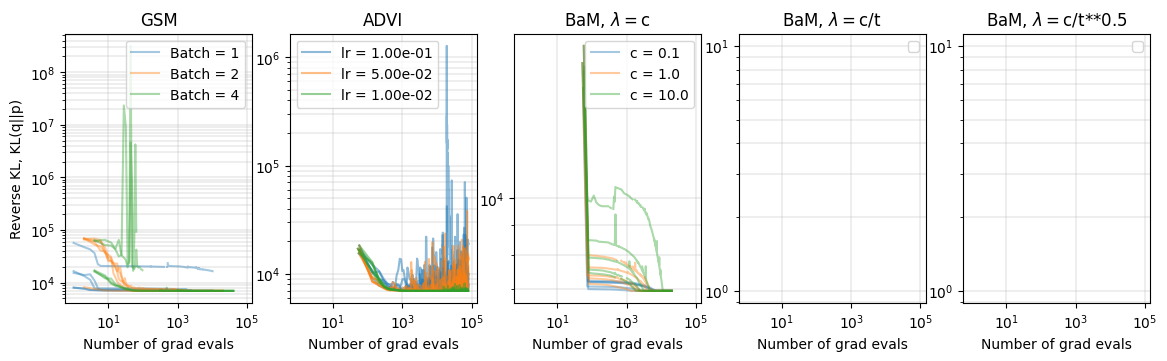

In [16]:
nmodel = 11
suffix = '-modeinit'

fig, ax = plt.subplots(1, 5, figsize=(14, 3.5), sharex=True, sharey=False)

batch = 2
for i, batch in enumerate([1, 2, 4]):
    for seed in range(5):
        try:
            path = f'//mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{nmodel}/gsm-frg/B{batch:02d}{suffix}/S{seed}/'
            nevals =  np.load(path + 'counts.npy')
            fkl =  np.load(path + 'fdivs.npy')[:, 0]*-1
            rkl =  np.load(path + 'qdivs.npy')[:, 0]
            lbl = f'Batch = {batch}' if seed == 0  else  None
            ax[0].plot(nevals, rkl, f'C{i}', alpha=0.4, label=lbl)
        except Exception as e:
            print(e)
ax[0].set_title('GSM')

batch =8
lr = 1e-2
for ilr, lr in enumerate([1e-1, 5e-2, 1e-2]):
    for seed in range(5):
        try:
            # path = f'//mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{nmodel}/bbvi-frg-full/B{batch:02d}-lr{lr:0.1e}/S{seed}/'
            # nevals =  np.load(path + 'counts.npy')
            # fkl =  np.load(path + 'fdivs.npy')[:, 0]*-1
            # rkl =  np.load(path + 'qdivs.npy')[:, 0]
            path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
            nevals =  np.load(path + 'nevals.npy')
            fkl =  np.load(path + 'fkl.npy')
            rkl =  np.load(path + 'rkl.npy')
            lbl = f'lr = {lr:0.2e}' if seed == 0  else  None
            ax[1].plot(nevals, rkl, f'C{ilr}', alpha=0.5, label=lbl)
        except Exception as e:
            print(e)

ax[1].set_title('ADVI')

#####
lt = 0
reg = 100
seed = 0
batch = 2
reglist = ['$\lambda=$c', '$\lambda=$c/t', '$\lambda=$c/t**0.5']

for lt in [0, 1, 2]:
    ax[2+lt].set_title(f'BaM, {reglist[lt]}')
    for ir, reg in enumerate([0.1, 1., 10., 100.]):
        for seed in range(5):
            try:
                path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
                nevals =  np.load(path + 'nevals.npy')
                fkl =  np.load(path + 'fkl.npy')
                rkl =  np.load(path + 'rkl.npy')
                lbl = f'c = {reg}' if seed == 0  else  None
                ax[2+lt].plot(nevals, rkl, f'C{ir}', alpha=0.4, label=lbl)
            except Exception as e:
                print(e)
                
for axis in ax:
    axis.semilogx()
    axis.loglog()
    axis.grid(which='both', lw=0.3)
    axis.legend()
    ax[0].set_ylabel('Reverse KL, KL(q||p)')
    axis.set_xlabel('Number of grad evals')
plt.legend()

# PDB 11 - bball_drive-hmm - Gauss


For model rkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B2-lambdat0-reg1.00/S0/fkl.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B4-lambdat0-reg10.00/S0/fkl.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B4-lambdat0-reg100.00/S0/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B8-lambdat0-reg0.10/S0/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B8-lambdat0-reg1.00/S0/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B8-lambdat0-reg10.00/S0/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B8-lambdat0-reg100.00/S0/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm/B16-lambdat0-reg0.10/S0/nevals.npy'
[Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_11/lsgsm

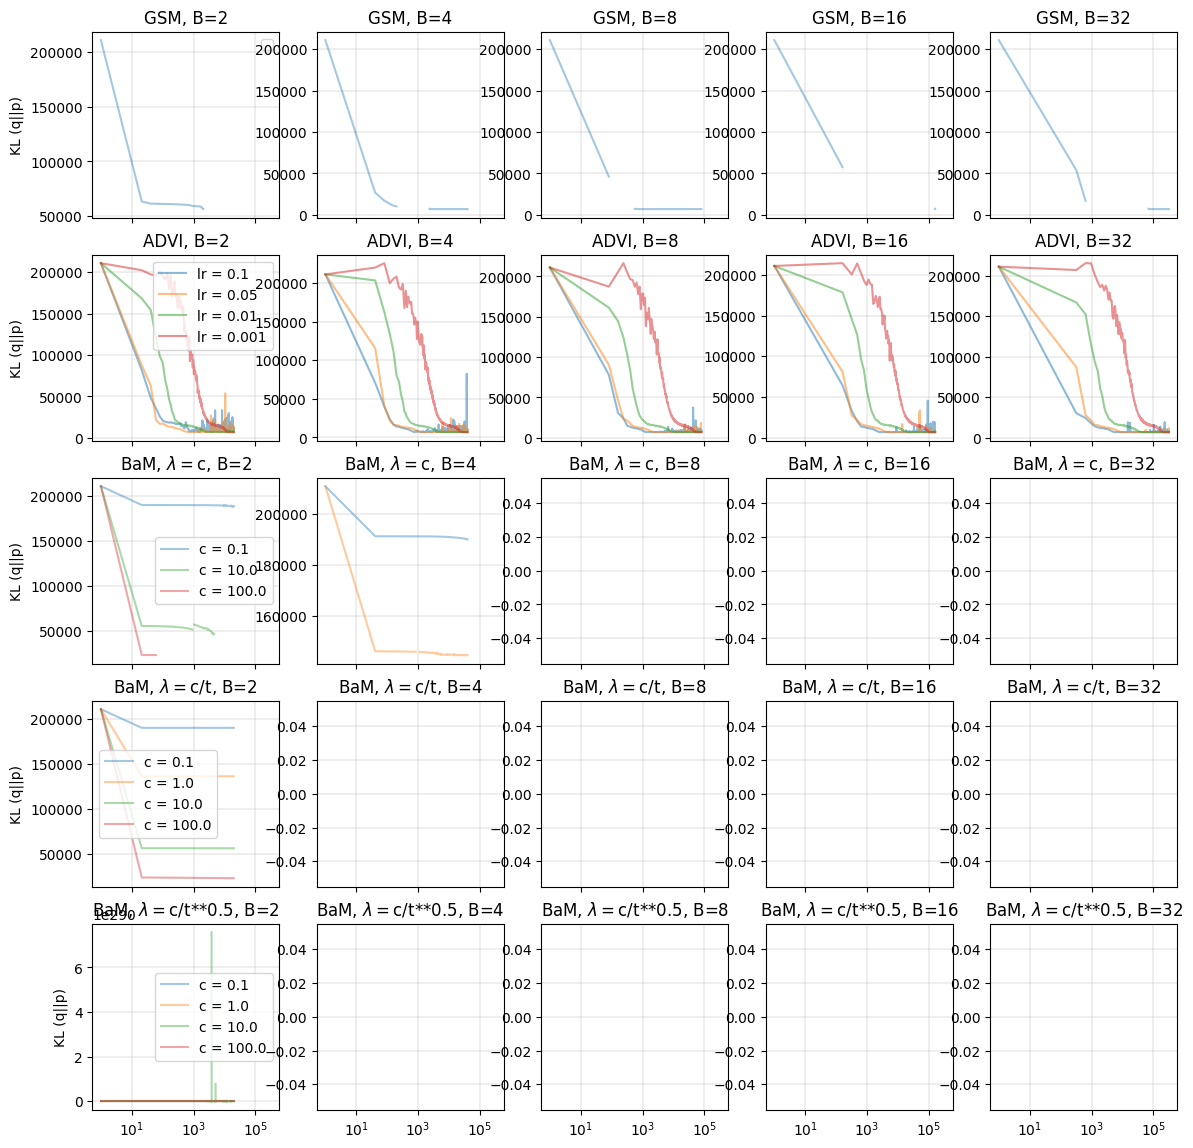

In [24]:
nmodel = 11
nseeds = 1
mode = 'rkl'
suffix = ''


for mode in ['rkl']:
    print(f'For model {mode}')
    fig, ax = plt.subplots(5, 5, figsize=(14, 14), sharex=True, sharey=False)

    batch = 2
    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[0, ib].set_title(f'GSM, B={batch}')
        for seed in range(nseeds):
            try:
                path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
                nevals =  np.load(path + 'nevals.npy')
                fkl =  np.load(path + 'fkl.npy')
                rkl =  np.load(path + 'rkl.npy')
                lbl = None
                if mode == 'fkl' : ax[0, ib].plot(nevals, fkl, f'C{0}', alpha=0.4, label=lbl)
                else : ax[0, ib].plot(nevals, rkl, f'C{0}', alpha=0.4, label=lbl)
            except Exception as e: print(e)


    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[1, ib].set_title(f'ADVI, B={batch}')
        for ilr, lr in enumerate([1e-1, 5e-2, 1e-2, 1e-3]):
            for seed in range(nseeds):
                try:
                    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
                    nevals =  np.load(path + 'nevals.npy')
                    fkl =  np.load(path + 'fkl.npy')
                    rkl =  np.load(path + 'rkl.npy')
                    lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
                    if mode == 'fkl' : ax[1, ib].plot(nevals, fkl, f'C{ilr}', alpha=0.5, label=lbl)
                    else : ax[1, ib].plot(nevals, rkl, f'C{ilr}', alpha=0.5, label=lbl)
                except Exception as e: print(e)

    #####
    lt = 0
    reg = 100
    seed = 0
    batch = 8

    for lt in [0, 1, 2]:
        for ib, batch in enumerate([2, 4, 8, 16, 32]):
            ax[2+lt, ib].set_title(f'BaM, {reglist[lt]}, B={batch}')
            for ir, reg in enumerate([0.1, 1., 10., 100.]):
                for seed in range(nseeds):
                    try:
                        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
                        nevals =  np.load(path + 'nevals.npy')
                        fkl =  np.load(path + 'fkl.npy')
                        rkl =  np.load(path + 'rkl.npy')
                        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
                        if mode == 'fkl' : ax[2+lt, ib].plot(nevals, fkl, f'C{ir}', alpha=0.4, label=lbl)
                        else: ax[2+lt, ib].plot(nevals, rkl, f'C{ir}', alpha=0.4, label=lbl)
                    except Exception as e: print(e)


    for axis in ax.flatten():
        # axis.loglog()
        axis.semilogx()
        axis.grid(which='both', lw=0.3)

    for axis in ax[:, 0]:
        axis.legend()
        if mode == 'fkl': axis.set_ylabel('KL (p||q)')
        elif mode == 'rkl': axis.set_ylabel('KL (q||p)')
    plt.show()

Model name : Model_11
param_unconstrain() failed with exception: Exception: stan::math::simplex_free: Simplex variable is not a valid simplex. sum(Simplex variable) = 1.0000005, but should be 1 (in '/mnt/ceph/users/cmodi/PosteriorDB/PDB_11/PDB_11.stan', line 12, column 2 to column 20)

'NoneType' object has no attribute 'copy'
(10000, 8)
(2000, 8) (6,)


IndexError: index 6 is out of bounds for axis 1 with size 6

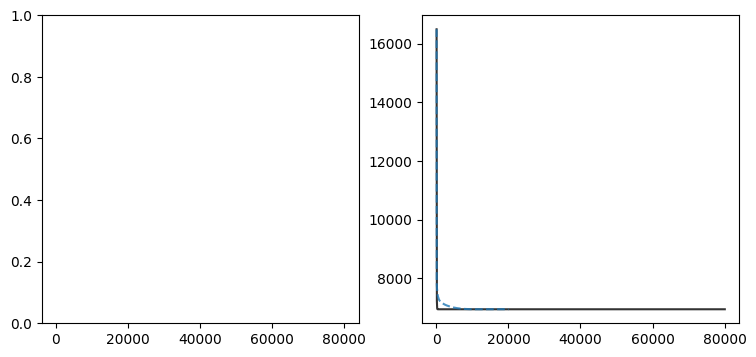

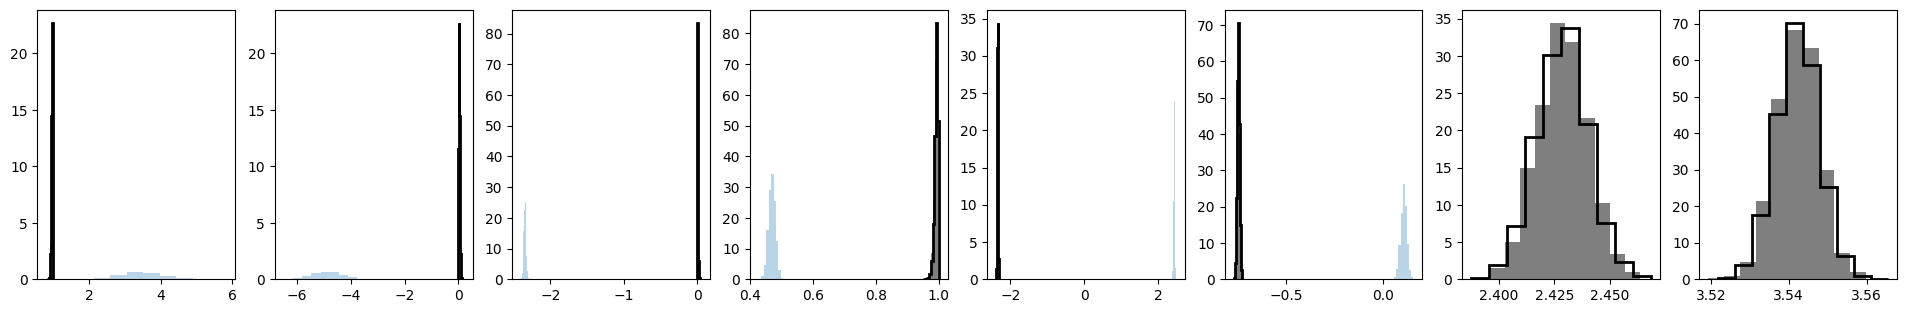

In [156]:
nmodel = 11
model, D, lpjaxsum, lp_g, ref_samples = setup_pdb(nmodel)
suffix = '-modeinit-scaleinit0.10'
nseeds = 1
seeds = [0]

fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=False)
lss = ['-', '--', ':', '-.']

ref_samples = model.samples.copy()[:, :8]
ndim = min(ref_samples.shape[1], 10)
print(ref_samples.shape)
fig2, ax2 = plt.subplots(1, ndim, figsize = (ndim*3, 3.5))
for i in range(ndim):
    ax2[i].hist(ref_samples[:, i], alpha=1., density=True, histtype='step', color='k', lw=2)



batch = 8
for seed in seeds:
    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
    nevals =  np.load(path + 'nevals.npy')
    fkl =  np.load(path + 'fkl.npy')
    rkl =  np.load(path + 'rkl.npy')
    lbl = 'GSM'
    # ax[0].plot(nevals, fkl, f'C{0}', alpha=0.8, label='GSM')
    ax[1].plot(nevals, rkl, f'k', alpha=0.8, label=lbl)
    mean =  np.load(path + 'mean.npy')
    cov =  np.load(path + 'cov.npy')
    samples = model.constrain(np.random.multivariate_normal(mean, cov, 2000))
    print(samples.shape, mean.shape)
    for i in range(ndim):
        ax2[i].hist(samples[:, i], color='k', alpha=0.5, density=True)


# bacth = 8
# # for ilr, lr in enumerate([1e-2, 1e-3]):
# for ilr, lr in enumerate([5e-3]):
#     for seed in seeds:
#         path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
#         nevals =  np.load(path + 'nevals.npy')
#         fkl =  np.load(path + 'fkl.npy')
#         rkl =  np.load(path + 'rkl.npy')
#         lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
#         ax[0].plot(nevals, fkl, f'C1', alpha=0.5, label='ADVI')
#         ax[1].plot(nevals, rkl, f'C1', alpha=0.5, label=lbl)
#         mean =  np.load(path + 'mean.npy')
#         cov =  np.load(path + 'cov.npy')
#         samples = np.random.multivariate_normal(mean, cov, 2000)
#         for i in range(ndim):
#             ax2[i].hist(samples[:, i], color='C1', alpha=0.5, density=True)

# #####
lt = 0
reg = 0
seed = 0
batch = 64
lt = 1

for batch in [2, 4, 8, 16, 32, 64, 128]:
# for batch in [2, 4, 8, 16, 32]:
    for seed in seeds:
        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
        nevals =  np.load(path + 'nevals.npy')
        fkl =  np.load(path + 'fkl.npy')
        rkl =  np.load(path + 'rkl.npy')
        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
        # ax[0].plot(nevals, fkl, ls=lss[lt], alpha=0.8, label=f'BaM {batch}')
        ax[1].plot(nevals, rkl, ls=lss[lt], alpha=0.8, label=lbl)
        mean =  np.load(path + 'mean.npy')
        cov =  np.load(path + 'cov.npy')
        samples = np.random.multivariate_normal(mean, cov, 2000)
        for i in range(ndim):
            ax2[i].hist(samples[:, i], alpha=0.3, density=True)

ax[0].semilogy()
# ax[1].semilogy()
ax[0].set_ylabel('KL (p||q)')
ax[1].set_ylabel('KL (q||p)')
ax[0].legend()
for axis in ax.flatten():
    # axis.loglog()
    axis.semilogx()
    axis.grid(which='both', lw=0.3)

fig.tight_layout()

# PDB 23  - diamonds - Gauss

For model fkl


NameError: name 'reglist' is not defined

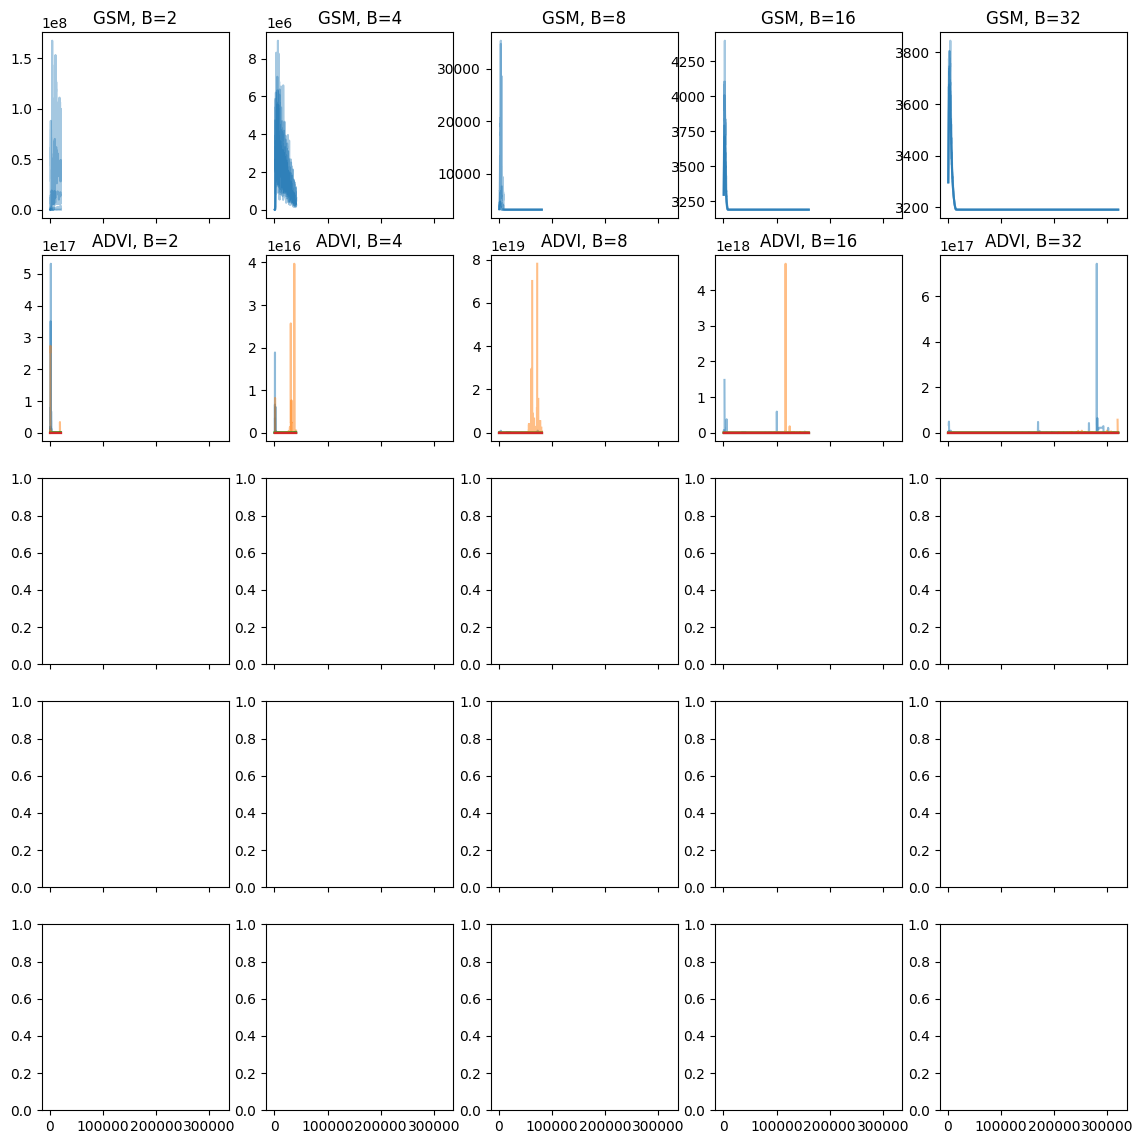

In [19]:
nmodel = 23
nseeds = 5
mode = 'fkl'
suffix = '-modeinit'


for mode in ['fkl', 'rkl']:
    print(f'For model {mode}')
    fig, ax = plt.subplots(5, 5, figsize=(14, 14), sharex=True, sharey=False)

    batch = 2
    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[0, ib].set_title(f'GSM, B={batch}')
        for seed in range(nseeds):
            try:
                path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
                nevals =  np.load(path + 'nevals.npy')
                fkl =  np.load(path + 'fkl.npy')
                rkl =  np.load(path + 'rkl.npy')
                lbl = None
                if mode == 'fkl' : ax[0, ib].plot(nevals, fkl, f'C{0}', alpha=0.4, label=lbl)
                else : ax[0, ib].plot(nevals, rkl, f'C{0}', alpha=0.4, label=lbl)
            except Exception as e: print(e)


    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[1, ib].set_title(f'ADVI, B={batch}')
        for ilr, lr in enumerate([1e-1, 5e-2, 1e-2, 1e-3]):
            for seed in range(nseeds):
                try:
                    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
                    nevals =  np.load(path + 'nevals.npy')
                    fkl =  np.load(path + 'fkl.npy')
                    rkl =  np.load(path + 'rkl.npy')
                    lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
                    if mode == 'fkl' : ax[1, ib].plot(nevals, fkl, f'C{ilr}', alpha=0.5, label=lbl)
                    else : ax[1, ib].plot(nevals, rkl, f'C{ilr}', alpha=0.5, label=lbl)
                except Exception as e: print(e)

    #####
    lt = 0
    reg = 100
    seed = 0
    batch = 8

    for lt in [0, 1, 2]:
        for ib, batch in enumerate([2, 4, 8, 16, 32]):
            ax[2+lt, ib].set_title(f'BaM, {reglist[lt]}, B={batch}')
            for ir, reg in enumerate([0.1, 1., 10., 100.]):
                for seed in range(nseeds):
                    try:
                        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
                        nevals =  np.load(path + 'nevals.npy')
                        fkl =  np.load(path + 'fkl.npy')
                        rkl =  np.load(path + 'rkl.npy')
                        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
                        if mode == 'fkl' : ax[2+lt, ib].plot(nevals, fkl, f'C{ir}', alpha=0.4, label=lbl)
                        else: ax[2+lt, ib].plot(nevals, rkl, f'C{ir}', alpha=0.4, label=lbl)
                    except Exception as e: print(e)


    for axis in ax.flatten():
        axis.loglog()
        axis.semilogx()
        axis.grid(which='both', lw=0.3)

    for axis in ax[:, 0]:
        axis.legend()
        if mode == 'fkl': axis.set_ylabel('KL (p||q)')
        elif mode == 'rkl': axis.set_ylabel('KL (q||p)')
    plt.show()

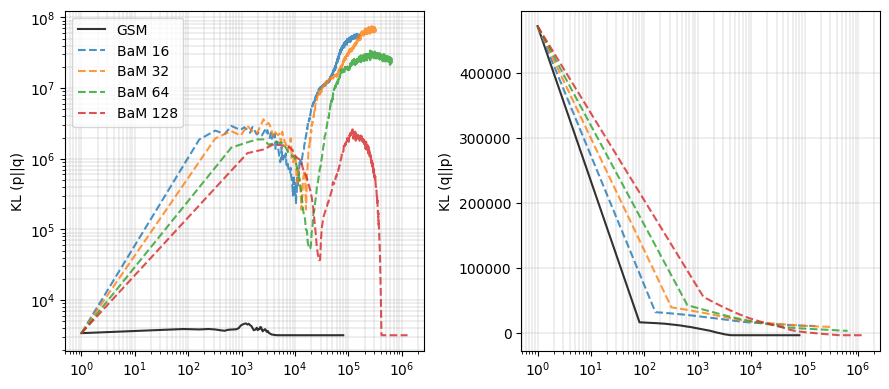

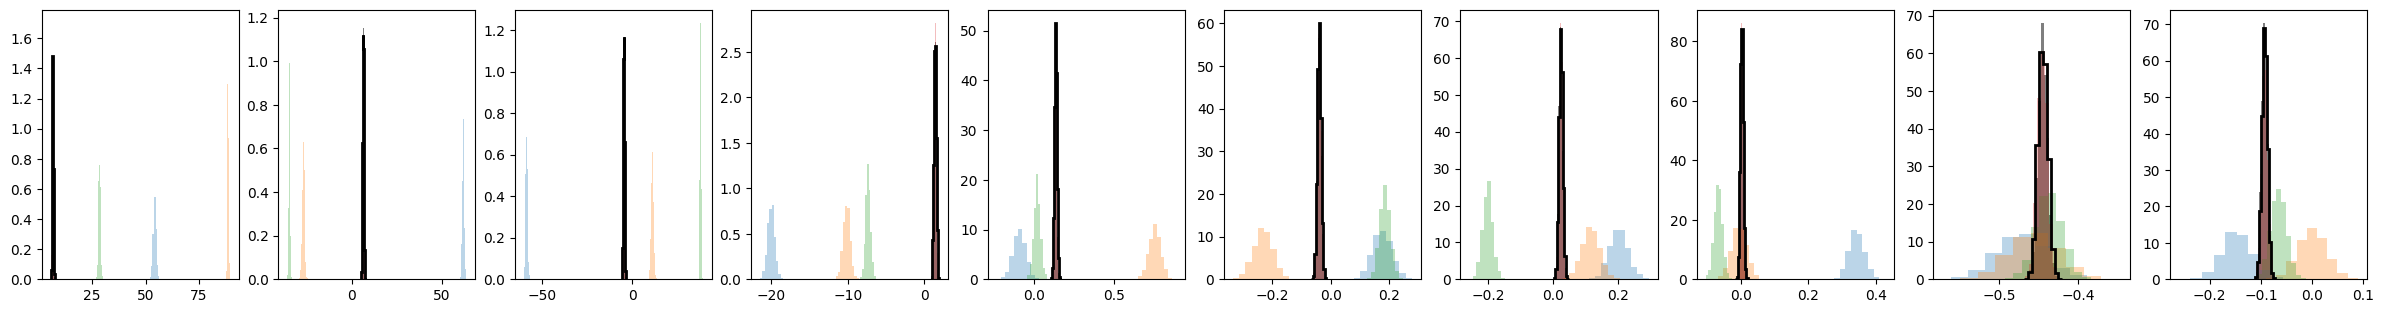

In [207]:
nmodel = 23
nseeds = 1
seeds = [2]

suffix = ''

fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=False)
lss = ['-', '--', ':', '-.']


ref_samples = np.load(f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/ref_samples.npy')
ndim = min(ref_samples.shape[1], 10)
fig2, ax2 = plt.subplots(1, ndim, figsize = (ndim*3, 3.5))
for i in range(ndim):
    ax2[i].hist(ref_samples[:, i], alpha=1., density=True, histtype='step', color='k', lw=2)



batch = 8
for seed in seeds:
    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
    nevals =  np.load(path + 'nevals.npy')
    fkl =  np.load(path + 'fkl.npy')
    rkl =  np.load(path + 'rkl.npy')
    lbl = None
    ax[0].plot(nevals, fkl, f'k', alpha=0.8, label='GSM')
    ax[1].plot(nevals, rkl, f'k', alpha=0.8, label=lbl)
    mean =  np.load(path + 'mean.npy')
    cov =  np.load(path + 'cov.npy')
    samples = np.random.multivariate_normal(mean, cov, 2000)
    for i in range(ndim):
        ax2[i].hist(samples[:, i], color='k', alpha=0.5, density=True)


# batch = 8
# # for ilr, lr in enumerate([1e-2, 1e-3]):
# for ilr, lr in enumerate([5e-3]):
#     for seed in seeds:
#         path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
#         nevals =  np.load(path + 'nevals.npy')
#         fkl =  np.load(path + 'fkl.npy')
#         rkl =  np.load(path + 'rkl.npy')
#         lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
#         ax[0].plot(nevals, fkl, f'C1', alpha=0.5, label='ADVI')
#         ax[1].plot(nevals, rkl, f'C1', alpha=0.5, label=lbl)
#         mean =  np.load(path + 'mean.npy')
#         cov =  np.load(path + 'cov.npy')
#         samples = np.random.multivariate_normal(mean, cov, 2000)
#         for i in range(ndim):
#             ax2[i].hist(samples[:, i], color='C1', alpha=0.5, density=True)

# #####
# #####
reg = 0
seed = 0
batch = 64
lt = 1

# for batch in [2, 4, 8, 16, 32, 64, 128]:
# for batch in [2, 4, 8, 16, 32]:
for batch in [16, 32, 64, 128]:
    for seed in seeds:
        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
        nevals =  np.load(path + 'nevals.npy')
        fkl =  np.load(path + 'fkl.npy')
        rkl =  np.load(path + 'rkl.npy')
        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
        ax[0].plot(nevals, fkl, ls=lss[lt], alpha=0.8, label=f'BaM {batch}')
        ax[1].plot(nevals, rkl, ls=lss[lt], alpha=0.8, label=lbl)
        mean =  np.load(path + 'mean.npy')
        cov =  np.load(path + 'cov.npy')
        samples = np.random.multivariate_normal(mean, cov, 2000)
        for i in range(ndim):
            ax2[i].hist(samples[:, i], alpha=0.3, density=True)

ax[0].semilogy()
# ax[1].semilogy()
ax[0].set_ylabel('KL (p||q)')
ax[1].set_ylabel('KL (q||p)')
ax[0].legend()
for axis in ax.flatten():
    # axis.loglog()
    axis.semilogx()
    axis.grid(which='both', lw=0.3)

fig.tight_layout()

# PDB 31 - (eight school centered) Non Gauss 
 

For model fkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


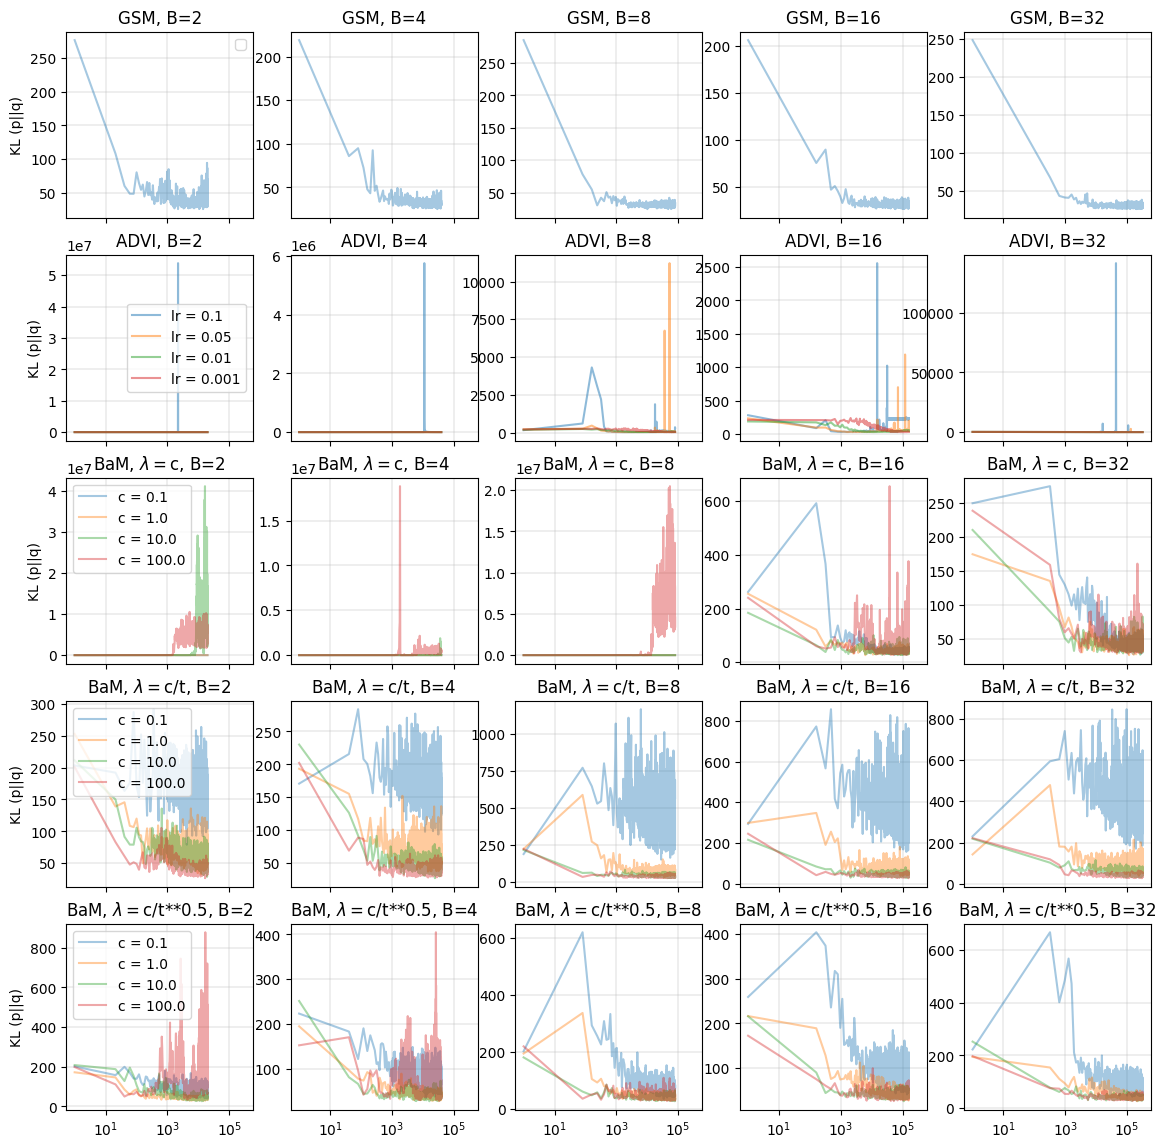

For model rkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


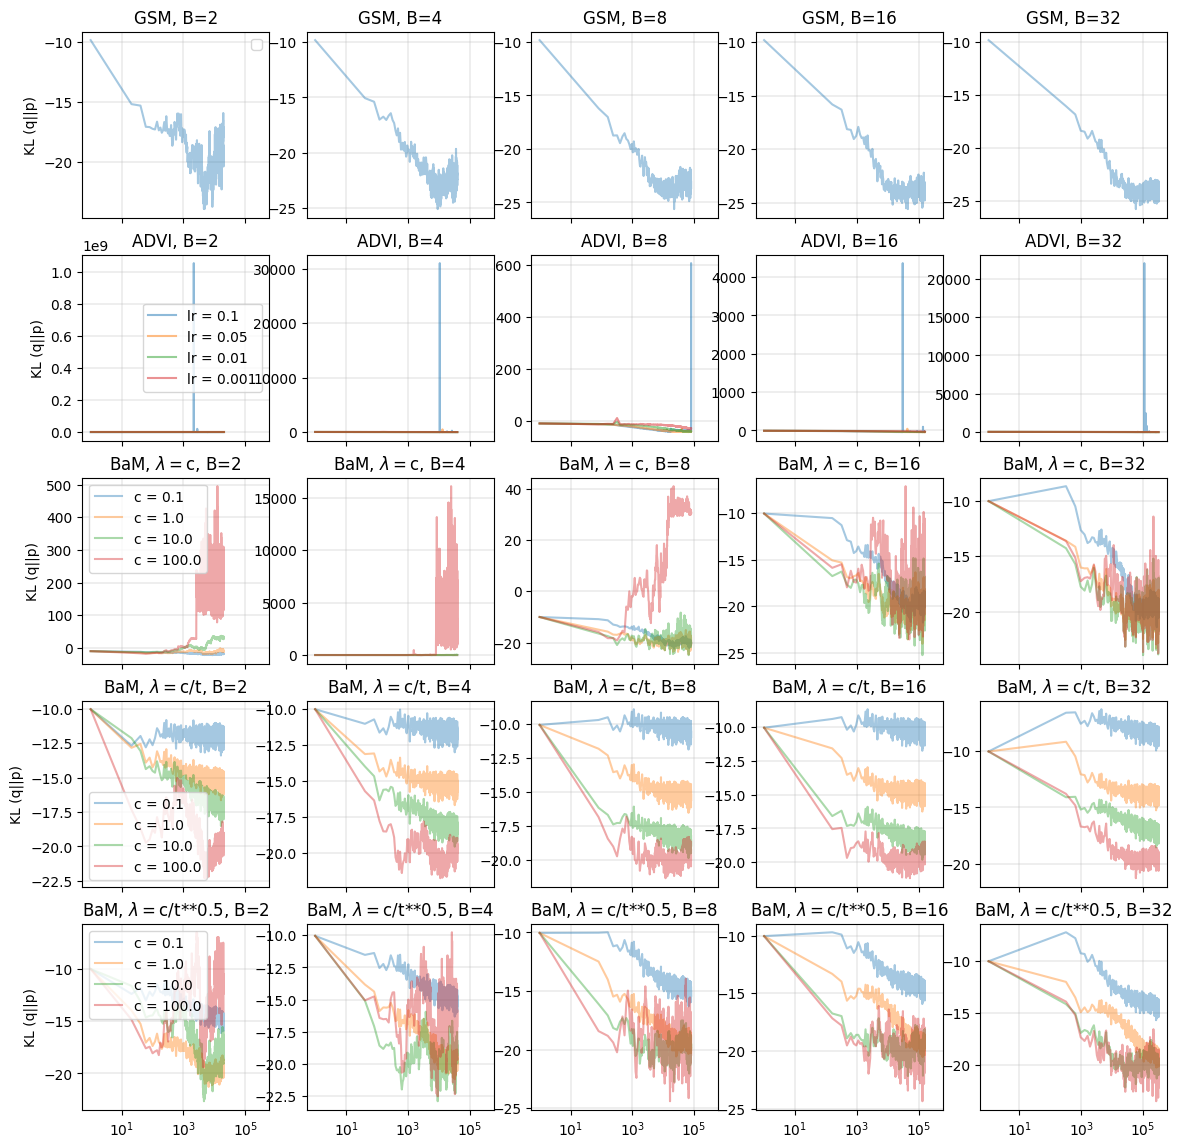

In [115]:
nmodel = 31
nseeds = 1
mode = 'fkl'
suffix = ''


for mode in ['fkl', 'rkl']:
    print(f'For model {mode}')
    fig, ax = plt.subplots(5, 5, figsize=(14, 14), sharex=True, sharey=False)

    batch = 2
    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[0, ib].set_title(f'GSM, B={batch}')
        for seed in range(nseeds):
            try:
                path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
                nevals =  np.load(path + 'nevals.npy')
                fkl =  np.load(path + 'fkl.npy')
                rkl =  np.load(path + 'rkl.npy')
                lbl = None
                if mode == 'fkl' : ax[0, ib].plot(nevals, fkl, f'C{0}', alpha=0.4, label=lbl)
                else : ax[0, ib].plot(nevals, rkl, f'C{0}', alpha=0.4, label=lbl)
            except Exception as e: print(e)


    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[1, ib].set_title(f'ADVI, B={batch}')
        for ilr, lr in enumerate([1e-1, 5e-2, 1e-2, 1e-3]):
            for seed in range(nseeds):
                try:
                    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
                    nevals =  np.load(path + 'nevals.npy')
                    fkl =  np.load(path + 'fkl.npy')
                    rkl =  np.load(path + 'rkl.npy')
                    lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
                    if mode == 'fkl' : ax[1, ib].plot(nevals, fkl, f'C{ilr}', alpha=0.5, label=lbl)
                    else : ax[1, ib].plot(nevals, rkl, f'C{ilr}', alpha=0.5, label=lbl)
                except Exception as e: print(e)

    #####
    lt = 0
    reg = 100
    seed = 0
    batch = 8

    for lt in [0, 1, 2]:
        for ib, batch in enumerate([2, 4, 8, 16, 32]):
            ax[2+lt, ib].set_title(f'BaM, {reglist[lt]}, B={batch}')
            for ir, reg in enumerate([0.1, 1., 10., 100.]):
                for seed in range(nseeds):
                    try:
                        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
                        nevals =  np.load(path + 'nevals.npy')
                        fkl =  np.load(path + 'fkl.npy')
                        rkl =  np.load(path + 'rkl.npy')
                        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
                        if mode == 'fkl' : ax[2+lt, ib].plot(nevals, fkl, f'C{ir}', alpha=0.4, label=lbl)
                        else: ax[2+lt, ib].plot(nevals, rkl, f'C{ir}', alpha=0.4, label=lbl)
                    except Exception as e: print(e)


    for axis in ax.flatten():
        # axis.loglog()
        axis.semilogx()
        axis.grid(which='both', lw=0.3)

    for axis in ax[:, 0]:
        axis.legend()
        if mode == 'fkl': axis.set_ylabel('KL (p||q)')
        elif mode == 'rkl': axis.set_ylabel('KL (q||p)')
    plt.show()

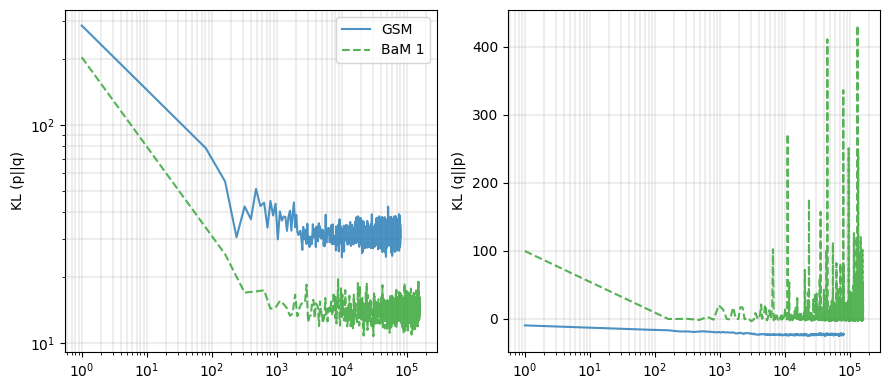

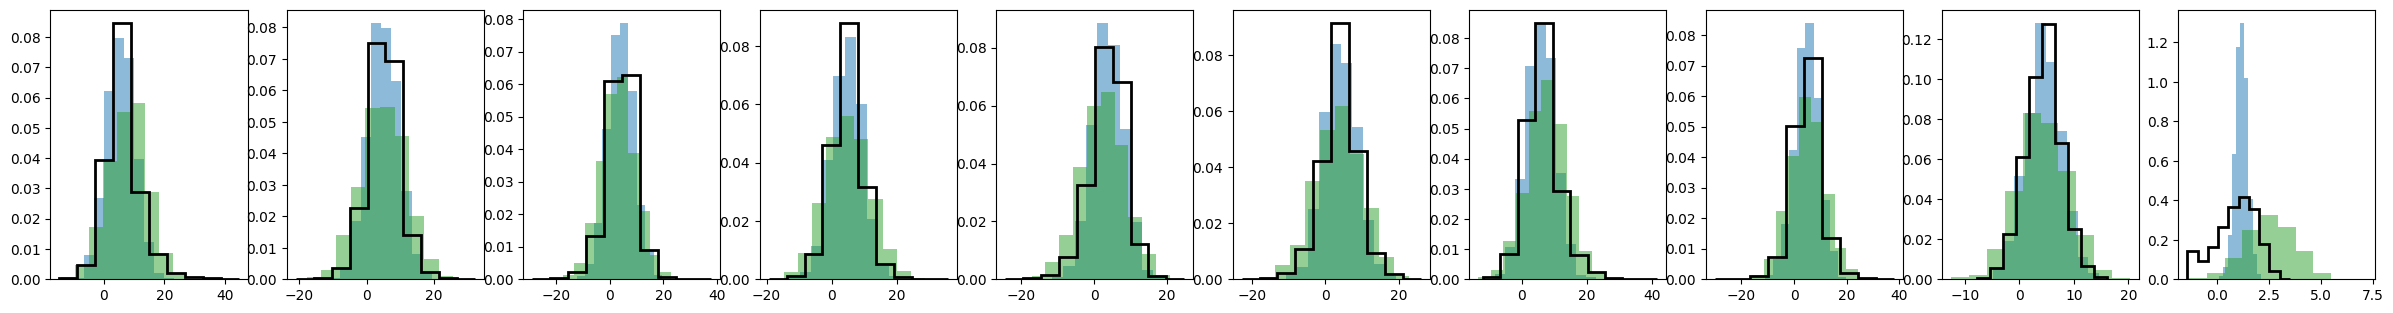

In [53]:
nmodel = 31
suffix = ''
nseeds = 1
seeds = [0]

fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=False)
lss = ['-', '--', ':', '-.']


ref_samples = np.load(f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/ref_samples.npy')
ndim = min(ref_samples.shape[1], 10)
fig2, ax2 = plt.subplots(1, ndim, figsize = (ndim*3, 3.5))
for i in range(ndim):
    ax2[i].hist(ref_samples[:, i], alpha=1., density=True, histtype='step', color='k', lw=2)



batch = 8
for seed in seeds:
    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
    nevals =  np.load(path + 'nevals.npy')
    fkl =  np.load(path + 'fkl.npy')
    rkl =  np.load(path + 'rkl.npy')
    lbl = None
    ax[0].plot(nevals, fkl, f'C{0}', alpha=0.8, label='GSM')
    ax[1].plot(nevals, rkl, f'C{0}', alpha=0.8, label=lbl)
    mean =  np.load(path + 'mean.npy')
    cov =  np.load(path + 'cov.npy')
    samples = np.random.multivariate_normal(mean, cov, 2000)
    for i in range(ndim):
        ax2[i].hist(samples[:, i], color='C0', alpha=0.5, density=True)


# bacth = 8
# # for ilr, lr in enumerate([1e-2, 1e-3]):
# for ilr, lr in enumerate([5e-3]):
#     for seed in seeds:
#         path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
#         nevals =  np.load(path + 'nevals.npy')
#         fkl =  np.load(path + 'fkl.npy')
#         rkl =  np.load(path + 'rkl.npy')
#         lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
#         ax[0].plot(nevals, fkl, f'C1', alpha=0.5, label='ADVI')
#         ax[1].plot(nevals, rkl, f'C1', alpha=0.5, label=lbl)
#         mean =  np.load(path + 'mean.npy')
#         cov =  np.load(path + 'cov.npy')
#         samples = np.random.multivariate_normal(mean, cov, 2000)
#         for i in range(ndim):
#             ax2[i].hist(samples[:, i], color='C1', alpha=0.5, density=True)

# #####
lt = 0
reg = 0
batch = 16

for lt in [1]:
    for seed in seeds:
        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
        nevals =  np.load(path + 'nevals.npy')
        fkl =  np.load(path + 'fkl.npy')
        rkl =  np.load(path + 'rkl.npy')
        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
        ax[0].plot(nevals, fkl, f'C2', ls=lss[lt], alpha=0.8, label=f'BaM {lt}')
        ax[1].plot(nevals, rkl, f'C2', ls=lss[lt], alpha=0.8, label=lbl)
        mean =  np.load(path + 'mean.npy')
        cov =  np.load(path + 'cov.npy')
        samples = np.random.multivariate_normal(mean, cov, 2000)
        for i in range(ndim):
            ax2[i].hist(samples[:, i], color='C2', alpha=0.5, density=True)

ax[0].semilogy()
# ax[1].semilogy()
ax[0].set_ylabel('KL (p||q)')
ax[1].set_ylabel('KL (q||p)')
ax[0].legend()
for axis in ax.flatten():
    # axis.loglog()
    axis.semilogx()
    axis.grid(which='both', lw=0.3)

fig.tight_layout()

# PDB 44 - arK-arK - Gauss


For model fkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


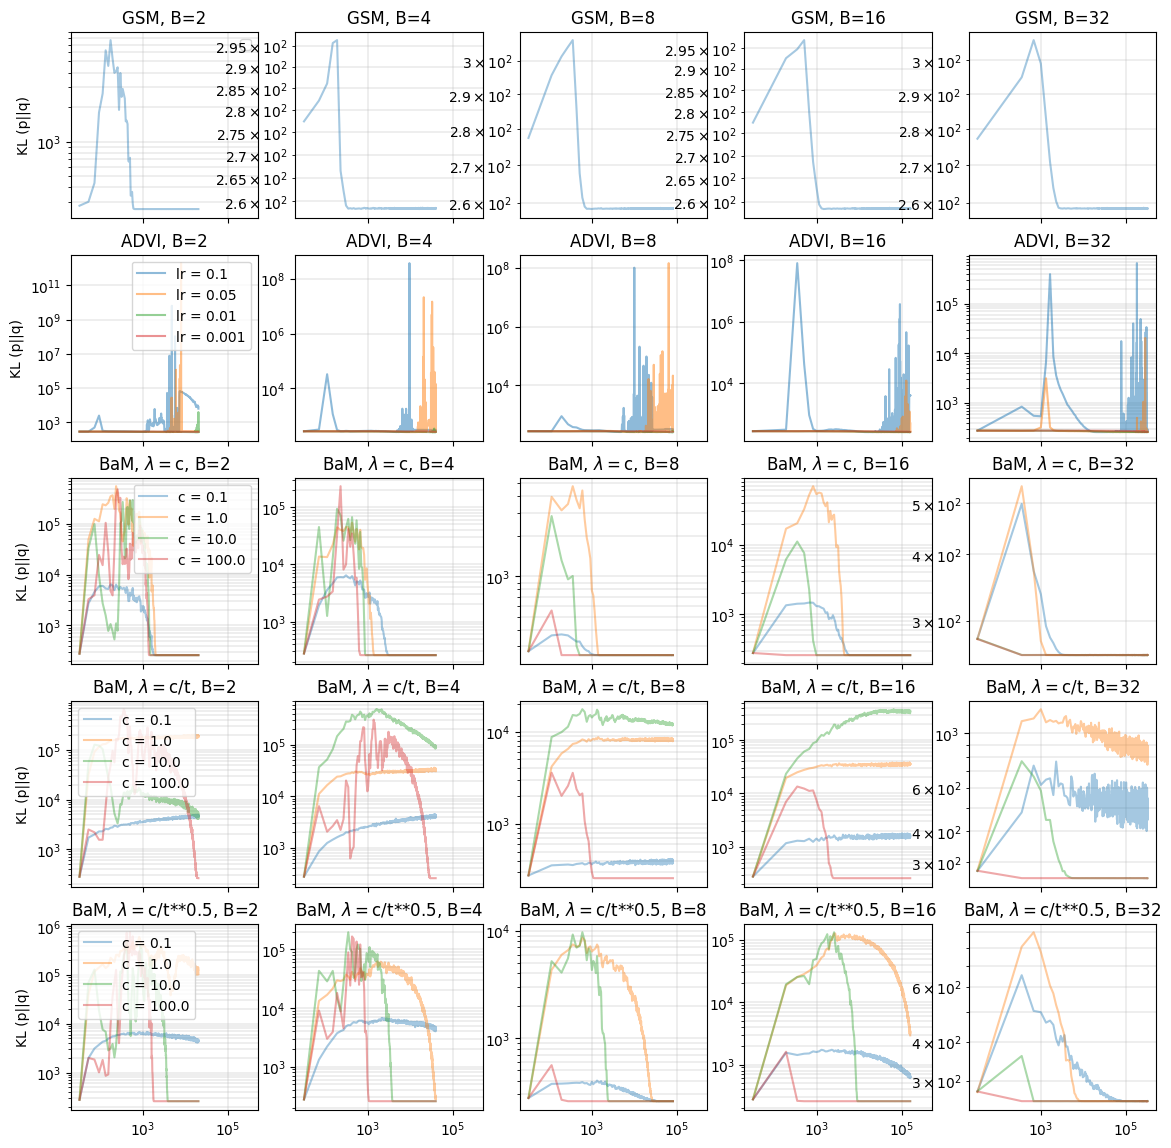

For model rkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


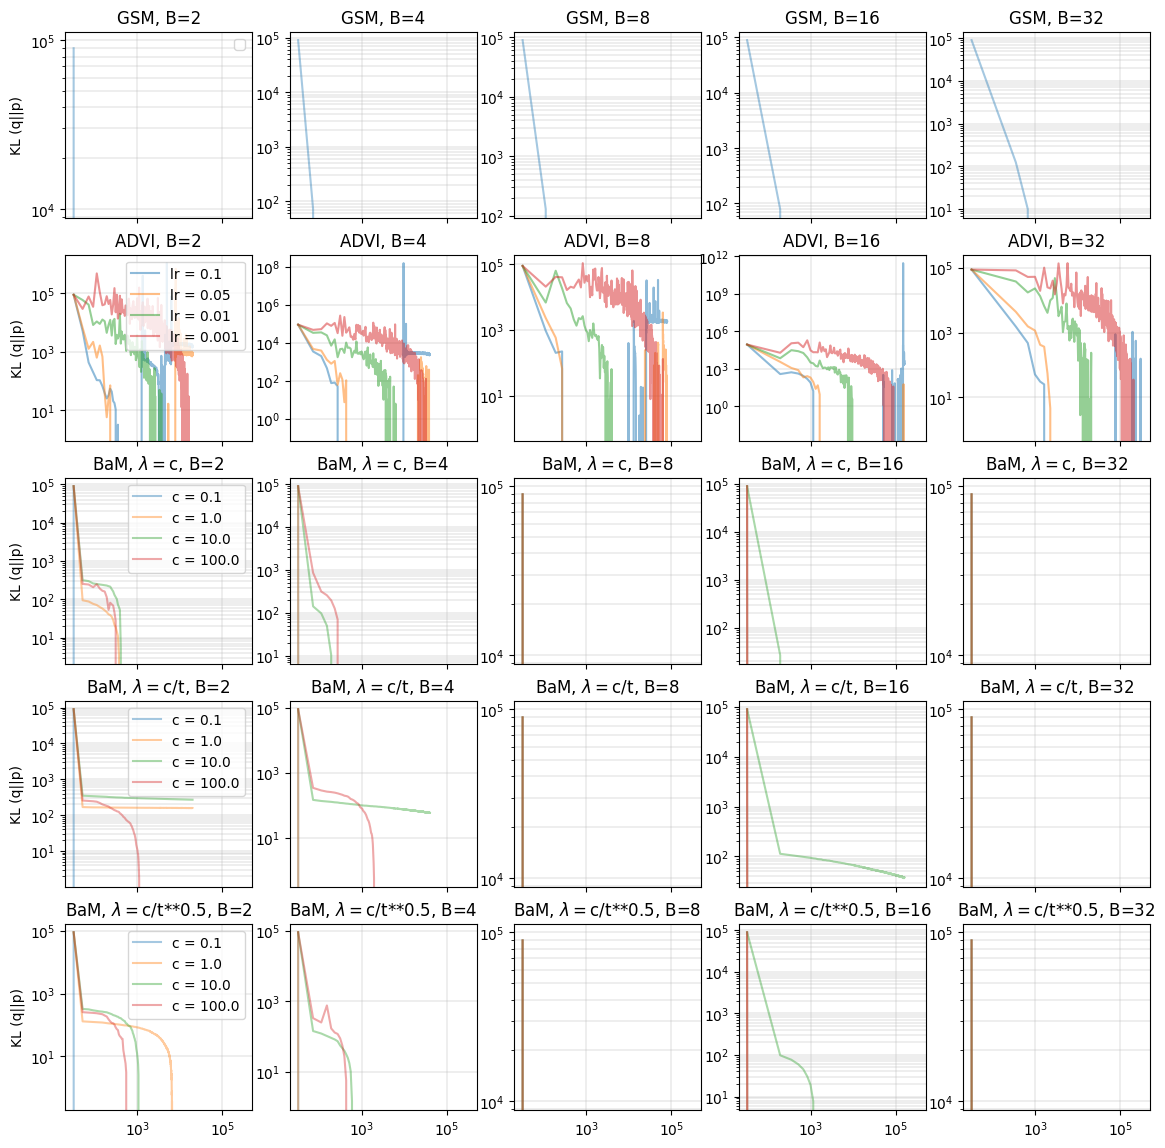

In [113]:
nmodel = 44
nseeds = 1
mode = 'fkl'
suffix = '-modeinit'


for mode in ['fkl', 'rkl']:
    print(f'For model {mode}')
    fig, ax = plt.subplots(5, 5, figsize=(14, 14), sharex=True, sharey=False)

    batch = 2
    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[0, ib].set_title(f'GSM, B={batch}')
        for seed in range(nseeds):
            try:
                path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
                nevals =  np.load(path + 'nevals.npy')
                fkl =  np.load(path + 'fkl.npy')
                rkl =  np.load(path + 'rkl.npy')
                lbl = None
                if mode == 'fkl' : ax[0, ib].plot(nevals, fkl, f'C{0}', alpha=0.4, label=lbl)
                else : ax[0, ib].plot(nevals, rkl, f'C{0}', alpha=0.4, label=lbl)
            except Exception as e: print(e)


    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[1, ib].set_title(f'ADVI, B={batch}')
        for ilr, lr in enumerate([1e-1, 5e-2, 1e-2, 1e-3]):
            for seed in range(nseeds):
                try:
                    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
                    nevals =  np.load(path + 'nevals.npy')
                    fkl =  np.load(path + 'fkl.npy')
                    rkl =  np.load(path + 'rkl.npy')
                    lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
                    if mode == 'fkl' : ax[1, ib].plot(nevals, fkl, f'C{ilr}', alpha=0.5, label=lbl)
                    else : ax[1, ib].plot(nevals, rkl, f'C{ilr}', alpha=0.5, label=lbl)
                except Exception as e: print(e)

    #####
    lt = 0
    reg = 100
    seed = 0
    batch = 8

    for lt in [0, 1, 2]:
        for ib, batch in enumerate([2, 4, 8, 16, 32]):
            ax[2+lt, ib].set_title(f'BaM, {reglist[lt]}, B={batch}')
            for ir, reg in enumerate([0.1, 1., 10., 100.]):
                for seed in range(nseeds):
                    try:
                        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
                        nevals =  np.load(path + 'nevals.npy')
                        fkl =  np.load(path + 'fkl.npy')
                        rkl =  np.load(path + 'rkl.npy')
                        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
                        if mode == 'fkl' : ax[2+lt, ib].plot(nevals, fkl, f'C{ir}', alpha=0.4, label=lbl)
                        else: ax[2+lt, ib].plot(nevals, rkl, f'C{ir}', alpha=0.4, label=lbl)
                    except Exception as e: print(e)


    for axis in ax.flatten():
        axis.loglog()
        axis.semilogx()
        axis.grid(which='both', lw=0.3)

    for axis in ax[:, 0]:
        axis.legend()
        if mode == 'fkl': axis.set_ylabel('KL (p||q)')
        elif mode == 'rkl': axis.set_ylabel('KL (q||p)')
    plt.show()

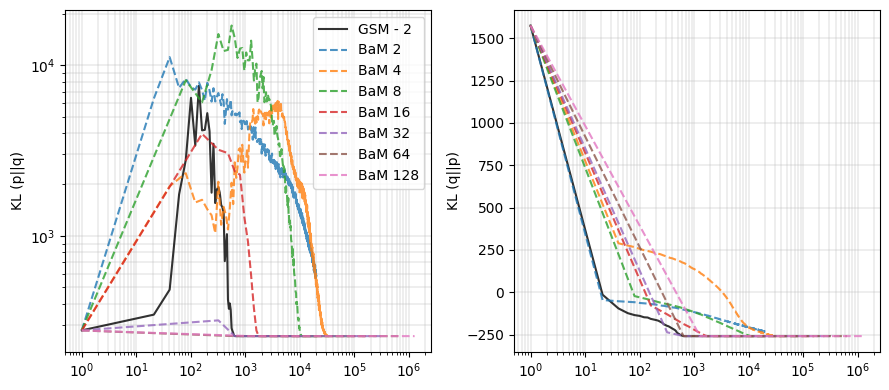

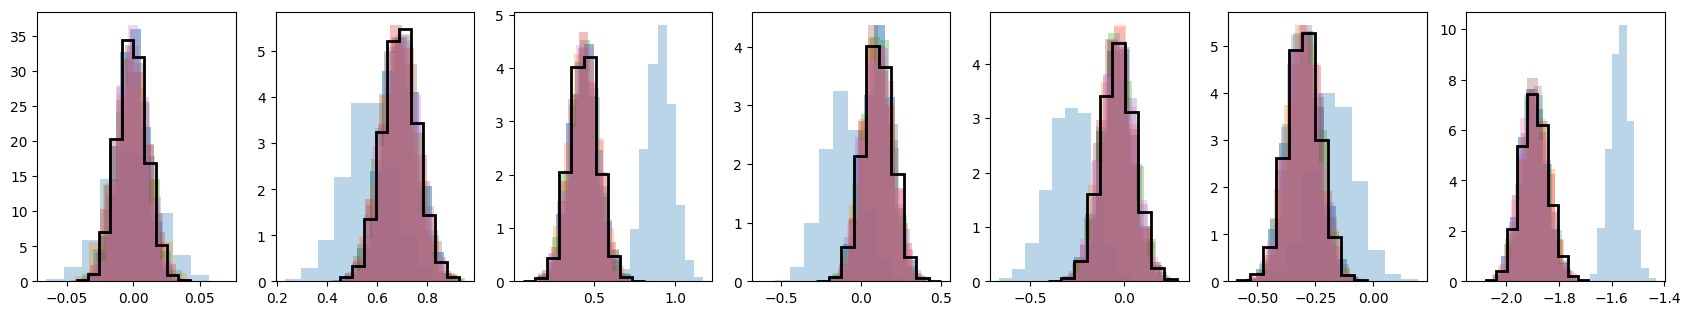

In [204]:
nmodel = 44
suffix = ''
nseeds = 2
seeds = [0]

fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=False)
lss = ['-', '--', ':', '-.']


ref_samples = np.load(f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/ref_samples.npy')
ndim = min(ref_samples.shape[1], 10)
fig2, ax2 = plt.subplots(1, ndim, figsize = (ndim*3, 3.5))
for i in range(ndim):
    ax2[i].hist(ref_samples[:, i], alpha=1., density=True, histtype='step', color='k', lw=2)



batch = 2
for seed in seeds:
    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
    nevals =  np.load(path + 'nevals.npy')
    fkl =  np.load(path + 'fkl.npy')
    rkl =  np.load(path + 'rkl.npy')
    lbl = None
    ax[0].plot(nevals, fkl, f'k', alpha=0.8, label=f'GSM - {batch}')
    ax[1].plot(nevals, rkl, f'k', alpha=0.8, label=lbl)
    mean =  np.load(path + 'mean.npy')
    cov =  np.load(path + 'cov.npy')
    samples = np.random.multivariate_normal(mean, cov, 2000)
    for i in range(ndim):
        ax2[i].hist(samples[:, i], color='C0', alpha=0.5, density=True)


# bacth = 8
# # for ilr, lr in enumerate([1e-2, 1e-3]):
# for ilr, lr in enumerate([5e-3]):
#     for seed in seeds:
#         path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
#         nevals =  np.load(path + 'nevals.npy')
#         fkl =  np.load(path + 'fkl.npy')
#         rkl =  np.load(path + 'rkl.npy')
#         lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
#         ax[0].plot(nevals, fkl, f'C1', alpha=0.5, label='ADVI')
#         ax[1].plot(nevals, rkl, f'C1', alpha=0.5, label=lbl)
#         mean =  np.load(path + 'mean.npy')
#         cov =  np.load(path + 'cov.npy')
#         samples = np.random.multivariate_normal(mean, cov, 2000)
#         for i in range(ndim):
#             ax2[i].hist(samples[:, i], color='C1', alpha=0.5, density=True)

# #####
lt = 1
reg = 0
seed = 0
batch = 64

for batch in [2, 4, 8, 16, 32, 64, 128]:
# for batch in [2, 4, 8, 16, 32]:
    for seed in seeds:
        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
        nevals =  np.load(path + 'nevals.npy')
        fkl =  np.load(path + 'fkl.npy')
        rkl =  np.load(path + 'rkl.npy')
        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
        ax[0].plot(nevals, fkl, ls=lss[lt], alpha=0.8, label=f'BaM {batch}')
        ax[1].plot(nevals, rkl, ls=lss[lt], alpha=0.8, label=lbl)
        mean =  np.load(path + 'mean.npy')
        cov =  np.load(path + 'cov.npy')
        samples = np.random.multivariate_normal(mean, cov, 2000)
        for i in range(ndim):
            ax2[i].hist(samples[:, i], alpha=0.3, density=True)

ax[0].semilogy()
# ax[1].semilogy()
ax[0].set_ylabel('KL (p||q)')
ax[1].set_ylabel('KL (q||p)')
ax[0].legend()
for axis in ax.flatten():
    # axis.loglog()
    axis.semilogx()
    axis.grid(which='both', lw=0.3)

fig.tight_layout()

# PDB 48  - low_dim_gauss_mix - Non Gauss


For model fkl


/tmp/ipykernel_2567017/1244443930.py:63: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis.loglog()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


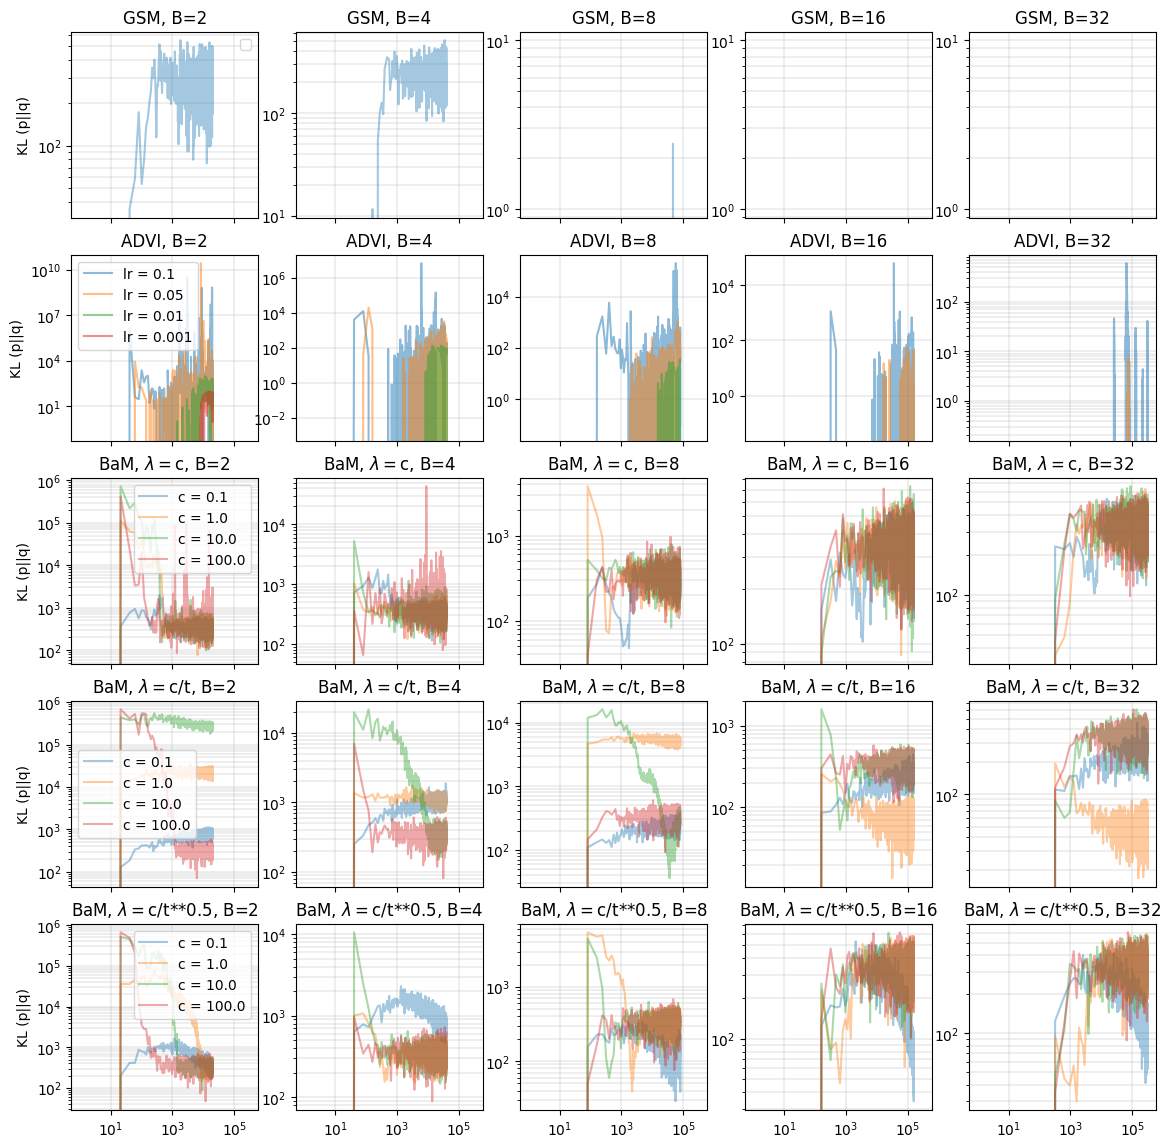

For model rkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


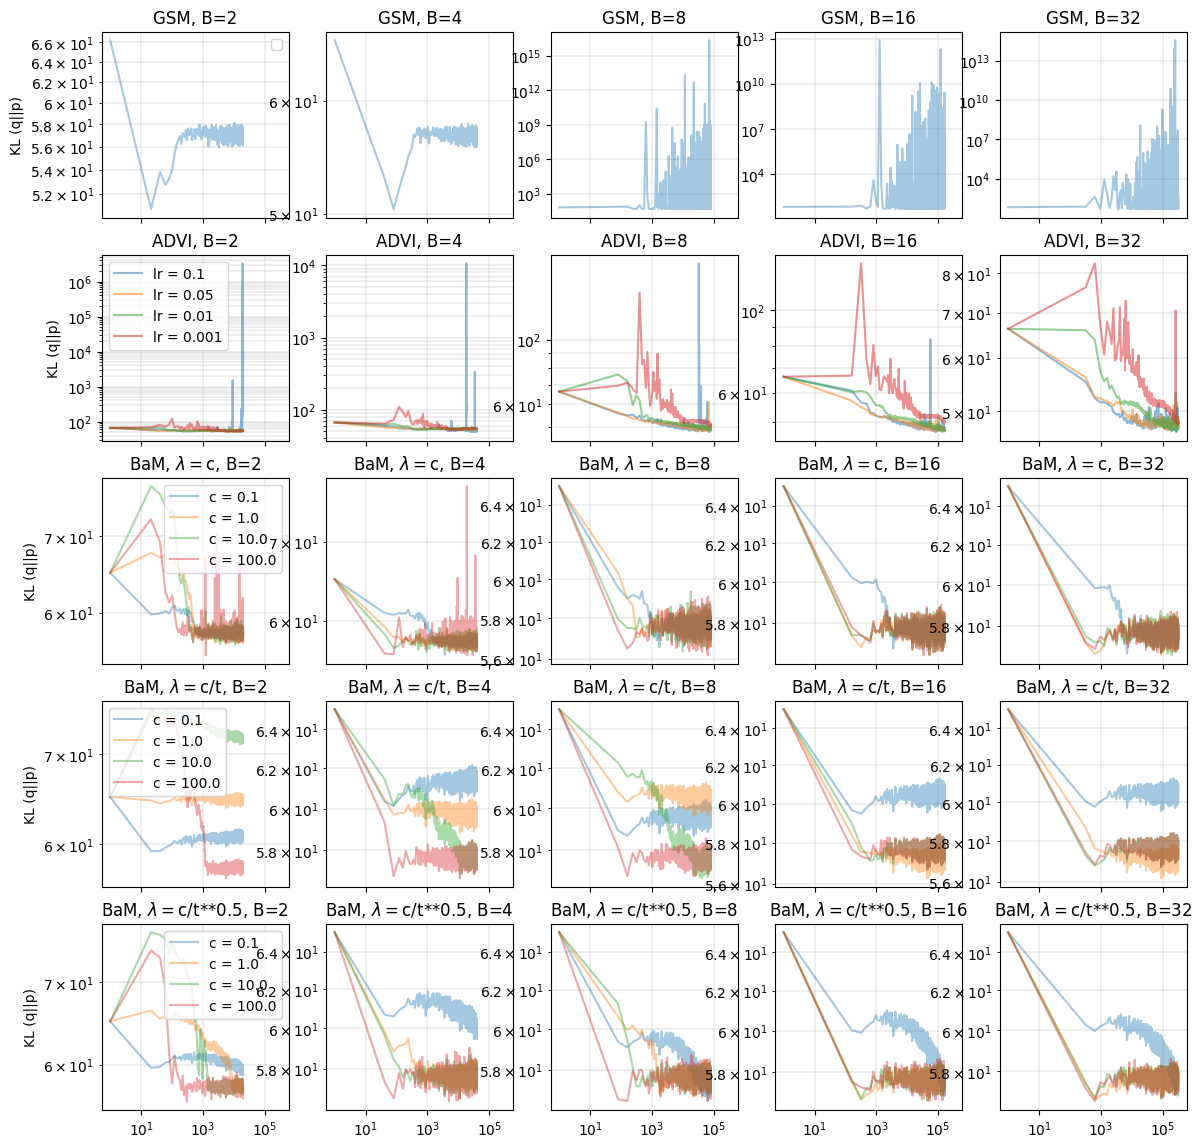

In [127]:
nmodel = 48
nseeds = 1
mode = 'fkl'
suffix = ''


for mode in ['fkl', 'rkl']:
    print(f'For model {mode}')
    fig, ax = plt.subplots(5, 5, figsize=(14, 14), sharex=True, sharey=False)

    batch = 2
    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[0, ib].set_title(f'GSM, B={batch}')
        for seed in range(nseeds):
            try:
                path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
                nevals =  np.load(path + 'nevals.npy')
                fkl =  np.load(path + 'fkl.npy')
                rkl =  np.load(path + 'rkl.npy')
                lbl = None
                if mode == 'fkl' : ax[0, ib].plot(nevals, fkl, f'C{0}', alpha=0.4, label=lbl)
                else : ax[0, ib].plot(nevals, rkl, f'C{0}', alpha=0.4, label=lbl)
            except Exception as e: print(e)


    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[1, ib].set_title(f'ADVI, B={batch}')
        for ilr, lr in enumerate([1e-1, 5e-2, 1e-2, 1e-3]):
            for seed in range(nseeds):
                try:
                    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
                    nevals =  np.load(path + 'nevals.npy')
                    fkl =  np.load(path + 'fkl.npy')
                    rkl =  np.load(path + 'rkl.npy')
                    lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
                    if mode == 'fkl' : ax[1, ib].plot(nevals, fkl, f'C{ilr}', alpha=0.5, label=lbl)
                    else : ax[1, ib].plot(nevals, rkl, f'C{ilr}', alpha=0.5, label=lbl)
                except Exception as e: print(e)

    #####
    lt = 0
    reg = 100
    seed = 0
    batch = 8

    for lt in [0, 1, 2]:
        for ib, batch in enumerate([2, 4, 8, 16, 32]):
            ax[2+lt, ib].set_title(f'BaM, {reglist[lt]}, B={batch}')
            for ir, reg in enumerate([0.1, 1., 10., 100.]):
                for seed in range(nseeds):
                    try:
                        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
                        nevals =  np.load(path + 'nevals.npy')
                        fkl =  np.load(path + 'fkl.npy')
                        rkl =  np.load(path + 'rkl.npy')
                        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
                        if mode == 'fkl' : ax[2+lt, ib].plot(nevals, fkl, f'C{ir}', alpha=0.4, label=lbl)
                        else: ax[2+lt, ib].plot(nevals, rkl, f'C{ir}', alpha=0.4, label=lbl)
                    except Exception as e: print(e)


    for axis in ax.flatten():
        axis.loglog()
        axis.semilogx()
        axis.grid(which='both', lw=0.3)

    for axis in ax[:, 0]:
        axis.legend()
        if mode == 'fkl': axis.set_ylabel('KL (p||q)')
        elif mode == 'rkl': axis.set_ylabel('KL (q||p)')
    plt.show()

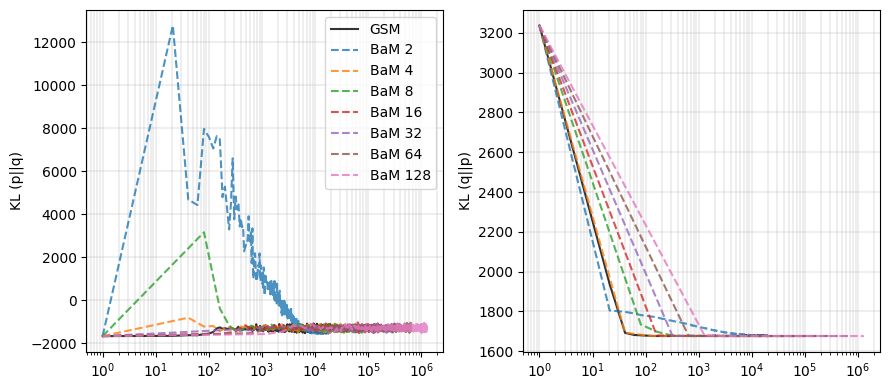

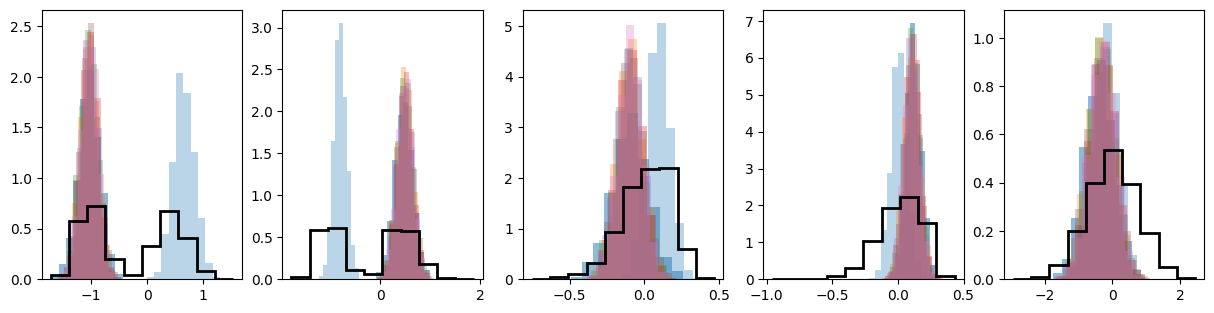

In [198]:
nmodel = 48 
suffix = ''
nseeds = 2
seeds = [1]

fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=False)
lss = ['-', '--', ':', '-.']


ref_samples = np.load(f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/ref_samples.npy')
ndim = min(ref_samples.shape[1], 10)
fig2, ax2 = plt.subplots(1, ndim, figsize = (ndim*3, 3.5))
for i in range(ndim):
    ax2[i].hist(ref_samples[:, i], alpha=1., density=True, histtype='step', color='k', lw=2)



batch = 2
for seed in seeds:
    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
    nevals =  np.load(path + 'nevals.npy')
    fkl =  np.load(path + 'fkl.npy')
    rkl =  np.load(path + 'rkl.npy')
    lbl = None
    ax[0].plot(nevals, fkl, f'k', alpha=0.8, label='GSM')
    ax[1].plot(nevals, rkl, f'k', alpha=0.8, label=lbl)
    mean =  np.load(path + 'mean.npy')
    cov =  np.load(path + 'cov.npy')
    samples = np.random.multivariate_normal(mean, cov, 2000)
    for i in range(ndim):
        ax2[i].hist(samples[:, i], color='C0', alpha=0.5, density=True)


# batch = 8
# # for ilr, lr in enumerate([1e-2, 1e-3]):
# for ilr, lr in enumerate([5e-3]):
#     for seed in seeds:
#         path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
#         nevals =  np.load(path + 'nevals.npy')
#         fkl =  np.load(path + 'fkl.npy')
#         rkl =  np.load(path + 'rkl.npy')
#         lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
#         ax[0].plot(nevals, fkl, f'C1', alpha=0.5, label='ADVI')
#         ax[1].plot(nevals, rkl, f'C1', alpha=0.5, label=lbl)
#         mean =  np.load(path + 'mean.npy')
#         cov =  np.load(path + 'cov.npy')
#         samples = np.random.multivariate_normal(mean, cov, 2000)
#         for i in range(ndim):
#             ax2[i].hist(samples[:, i], color='C1', alpha=0.5, density=True)

# #####
lt = 1
reg = 0
seed = 0
batch = 8

for batch in [2, 4, 8, 16, 32, 64, 128]:
# for batch in [2, 4, 8, 16, 32]:
    for seed in seeds:
        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
        nevals =  np.load(path + 'nevals.npy')
        fkl =  np.load(path + 'fkl.npy')
        rkl =  np.load(path + 'rkl.npy')
        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
        ax[0].plot(nevals, fkl, ls=lss[lt], alpha=0.8, label=f'BaM {batch}')
        ax[1].plot(nevals, rkl, ls=lss[lt], alpha=0.8, label=lbl)
        mean =  np.load(path + 'mean.npy')
        cov =  np.load(path + 'cov.npy')
        samples = np.random.multivariate_normal(mean, cov, 2000)
        for i in range(ndim):
            ax2[i].hist(samples[:, i], alpha=0.3, density=True)


# ax[0].semilogy()
# ax[1].semilogy()
ax[0].set_ylabel('KL (p||q)')
ax[1].set_ylabel('KL (q||p)')
ax[0].legend()
for axis in ax.flatten():
    # axis.loglog()
    axis.semilogx()
    axis.grid(which='both', lw=0.3)

fig.tight_layout()

# PDB 51 - hudson_lynx_hare - Gauss

For model fkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


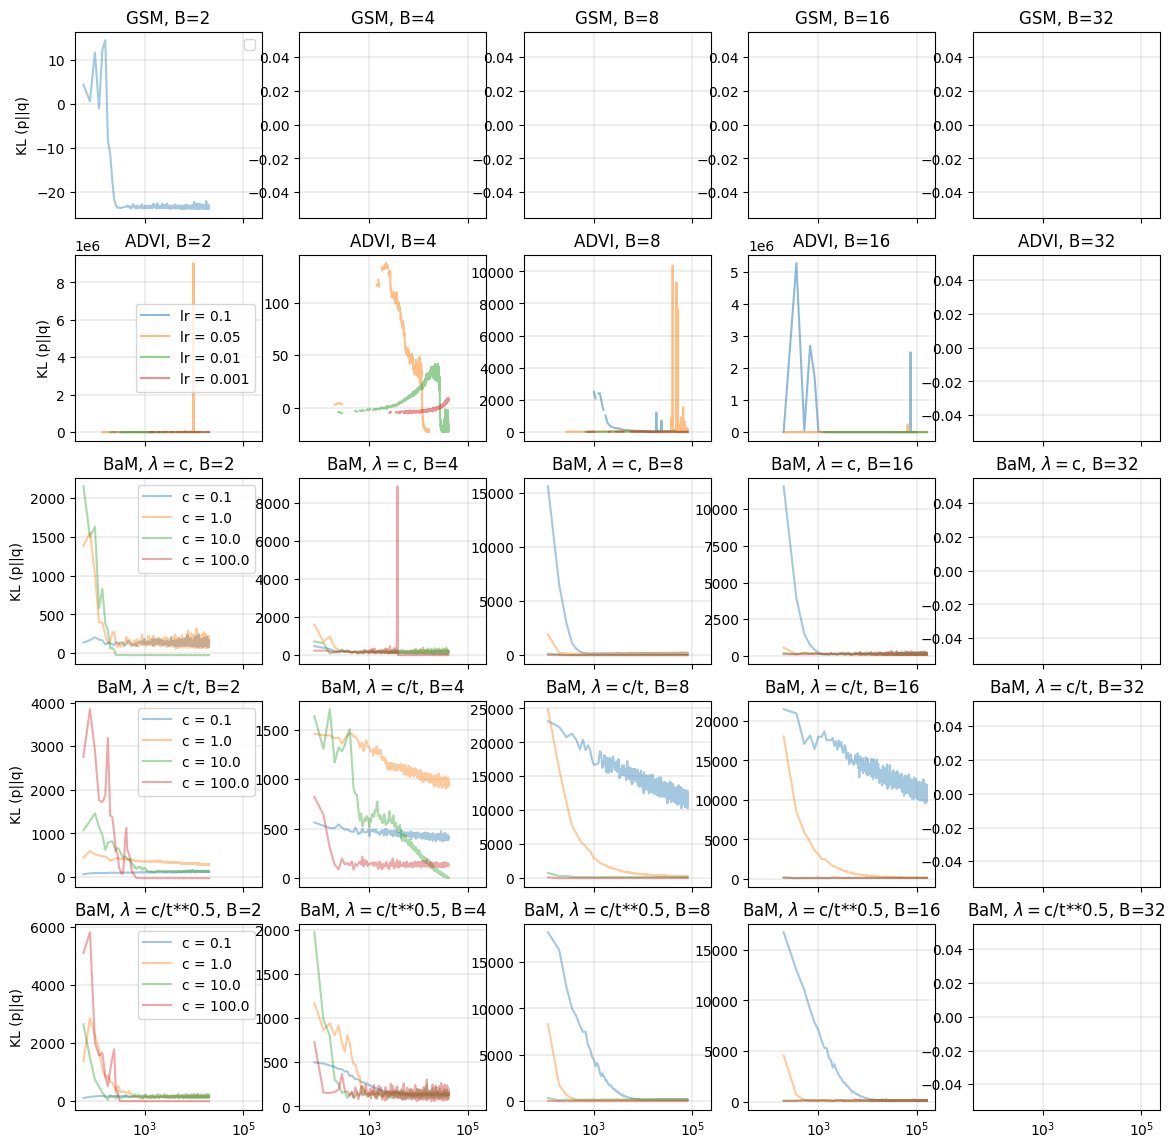

For model rkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


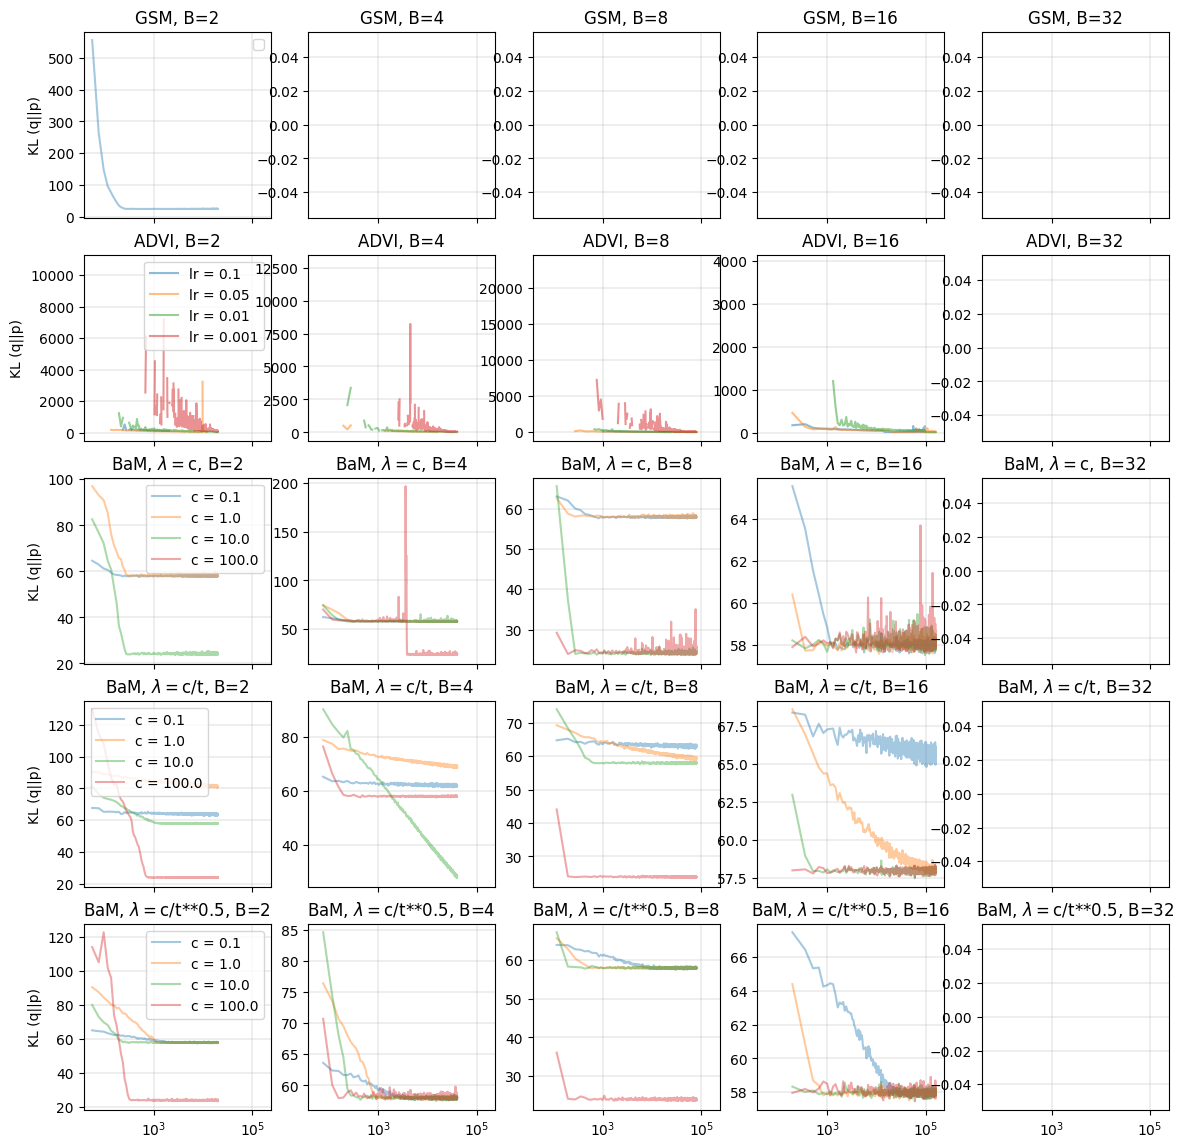

In [131]:
nmodel = 51
nseeds = 1
mode = 'fkl'
suffix = '-modeinit'


for mode in ['fkl', 'rkl']:
    print(f'For model {mode}')
    fig, ax = plt.subplots(5, 5, figsize=(14, 14), sharex=True, sharey=False)

    batch = 2
    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[0, ib].set_title(f'GSM, B={batch}')
        for seed in range(nseeds):
            try:
                path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
                nevals =  np.load(path + 'nevals.npy')
                fkl =  np.load(path + 'fkl.npy')
                rkl =  np.load(path + 'rkl.npy')
                lbl = None
                if mode == 'fkl' : ax[0, ib].plot(nevals, fkl, f'C{0}', alpha=0.4, label=lbl)
                else : ax[0, ib].plot(nevals, rkl, f'C{0}', alpha=0.4, label=lbl)
            except Exception as e: print(e)


    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[1, ib].set_title(f'ADVI, B={batch}')
        for ilr, lr in enumerate([1e-1, 5e-2, 1e-2, 1e-3]):
            for seed in range(nseeds):
                try:
                    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
                    nevals =  np.load(path + 'nevals.npy')
                    fkl =  np.load(path + 'fkl.npy')
                    rkl =  np.load(path + 'rkl.npy')
                    lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
                    if mode == 'fkl' : ax[1, ib].plot(nevals, fkl, f'C{ilr}', alpha=0.5, label=lbl)
                    else : ax[1, ib].plot(nevals, rkl, f'C{ilr}', alpha=0.5, label=lbl)
                except Exception as e: print(e)

    #####
    lt = 0
    reg = 100
    seed = 0
    batch = 8

    for lt in [0, 1, 2]:
        for ib, batch in enumerate([2, 4, 8, 16, 32]):
            ax[2+lt, ib].set_title(f'BaM, {reglist[lt]}, B={batch}')
            for ir, reg in enumerate([0.1, 1., 10., 100.]):
                for seed in range(nseeds):
                    try:
                        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
                        nevals =  np.load(path + 'nevals.npy')
                        fkl =  np.load(path + 'fkl.npy')
                        rkl =  np.load(path + 'rkl.npy')
                        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
                        if mode == 'fkl' : ax[2+lt, ib].plot(nevals, fkl, f'C{ir}', alpha=0.4, label=lbl)
                        else: ax[2+lt, ib].plot(nevals, rkl, f'C{ir}', alpha=0.4, label=lbl)
                    except Exception as e: print(e)


    for axis in ax.flatten():
        # axis.loglog()
        axis.semilogx()
        axis.grid(which='both', lw=0.3)

    for axis in ax[:, 0]:
        axis.legend()
        if mode == 'fkl': axis.set_ylabel('KL (p||q)')
        elif mode == 'rkl': axis.set_ylabel('KL (q||p)')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_51/lsgsm/B8-lambdat1-reg0.00/S1/mean.npy'

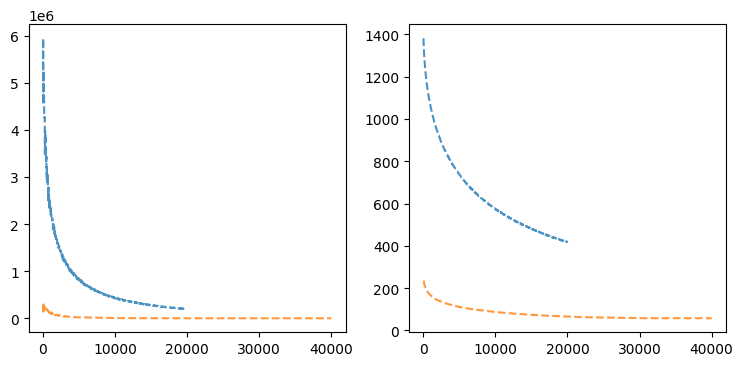

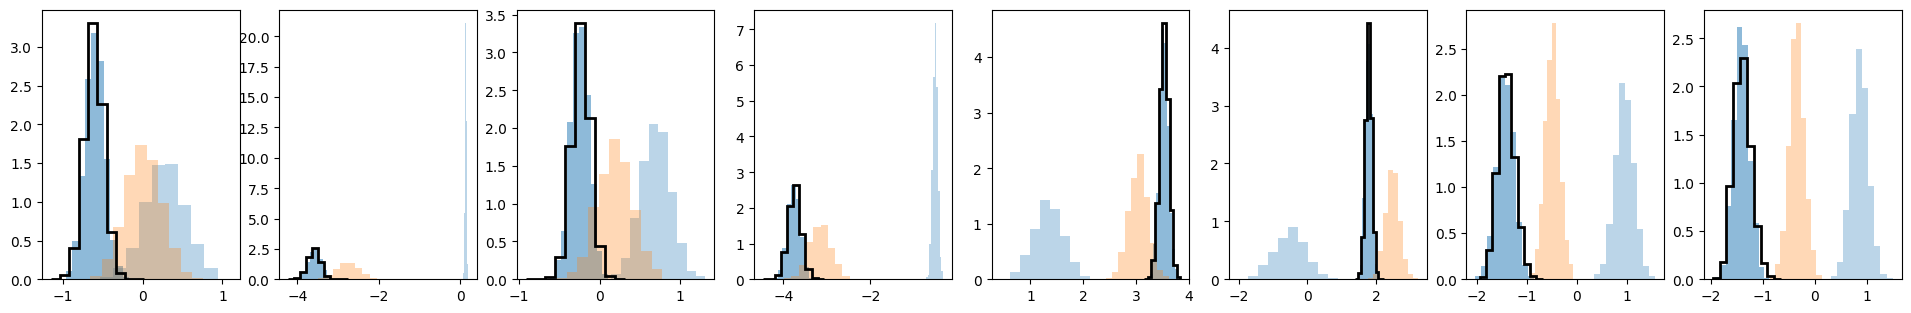

In [182]:
nmodel = 51
suffix = ''
nseeds = 2
seeds = [1]

fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=False)
lss = ['-', '--', ':', '-.']


ref_samples = np.load(f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/ref_samples.npy')
ndim = min(ref_samples.shape[1], 10)
fig2, ax2 = plt.subplots(1, ndim, figsize = (ndim*3, 3.5))
for i in range(ndim):
    ax2[i].hist(ref_samples[:, i], alpha=1., density=True, histtype='step', color='k', lw=2)



batch = 2
for seed in seeds:
    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
    nevals =  np.load(path + 'nevals.npy')
    fkl =  np.load(path + 'fkl.npy')
    rkl =  np.load(path + 'rkl.npy')
    lbl = None
    ax[0].plot(nevals, fkl, f'k', alpha=0.8, label=f'GSM {batch}')
    ax[1].plot(nevals, rkl, f'k', alpha=0.8, label=lbl)
    mean =  np.load(path + 'mean.npy')
    cov =  np.load(path + 'cov.npy')
    samples = np.random.multivariate_normal(mean, cov, 2000)
    for i in range(ndim):
        ax2[i].hist(samples[:, i], color='C0', alpha=0.5, density=True)


# batch = 8
# # for ilr, lr in enumerate([1e-2, 1e-3]):
# for ilr, lr in enumerate([5e-3]):
#     for seed in seeds:
#         path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
#         nevals =  np.load(path + 'nevals.npy')
#         fkl =  np.load(path + 'fkl.npy')
#         rkl =  np.load(path + 'rkl.npy')
#         lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
#         ax[0].plot(nevals, fkl, f'C1', alpha=0.5, label='ADVI')
#         ax[1].plot(nevals, rkl, f'C1', alpha=0.5, label=lbl)
#         mean =  np.load(path + 'mean.npy')
#         cov =  np.load(path + 'cov.npy')
#         samples = np.random.multivariate_normal(mean, cov, 2000)
#         for i in range(ndim):
#             ax2[i].hist(samples[:, i], color='C1', alpha=0.5, density=True)

# #####
# #####
lt = 0
reg = 0
seed = 0
batch = 64
lt = 1

# for batch in [2, 4, 8, 16, 32, 64, 128]:
for batch in [2, 4, 8, 16, 32]:
    for seed in seeds:
        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
        nevals =  np.load(path + 'nevals.npy')
        fkl =  np.load(path + 'fkl.npy')
        rkl =  np.load(path + 'rkl.npy')
        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
        ax[0].plot(nevals, fkl, ls=lss[lt], alpha=0.8, label=f'BaM {batch}')
        ax[1].plot(nevals, rkl, ls=lss[lt], alpha=0.8, label=lbl)
        mean =  np.load(path + 'mean.npy')
        cov =  np.load(path + 'cov.npy')
        samples = np.random.multivariate_normal(mean, cov, 2000)
        for i in range(ndim):
            ax2[i].hist(samples[:, i], alpha=0.3, density=True)

# ax[0].semilogy()
# ax[1].semilogy()
ax[0].set_ylabel('KL (p||q)')
ax[1].set_ylabel('KL (q||p)')
ax[0].legend()
for axis in ax.flatten():
    # axis.loglog()
    axis.semilogx()
    axis.grid(which='both', lw=0.3)

fig.tight_layout()

# PDB 64 - gp_pois_regr - Non Gauss

For model fkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


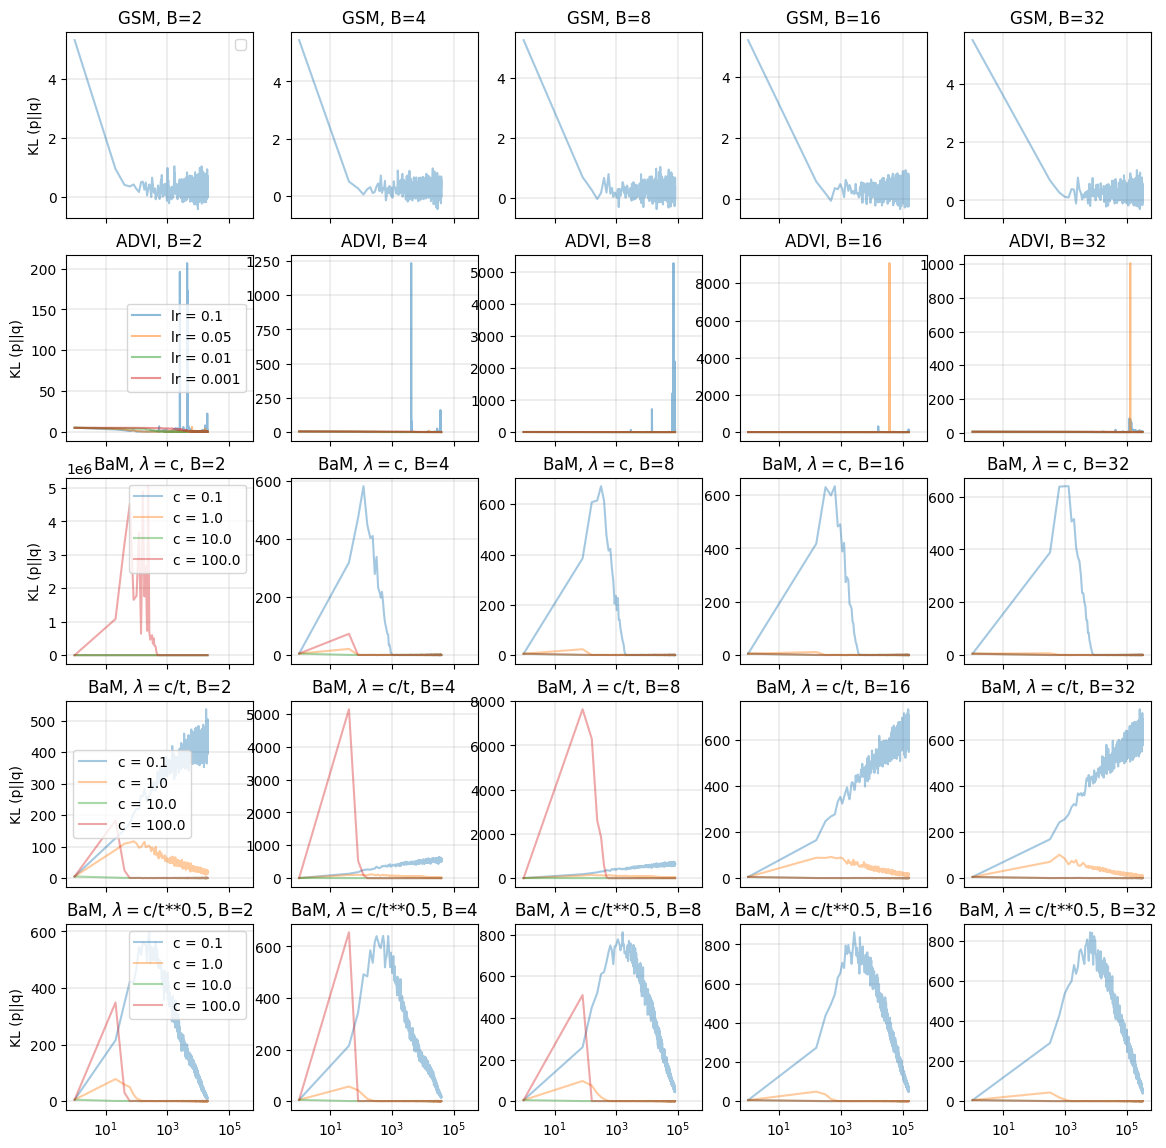

For model rkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


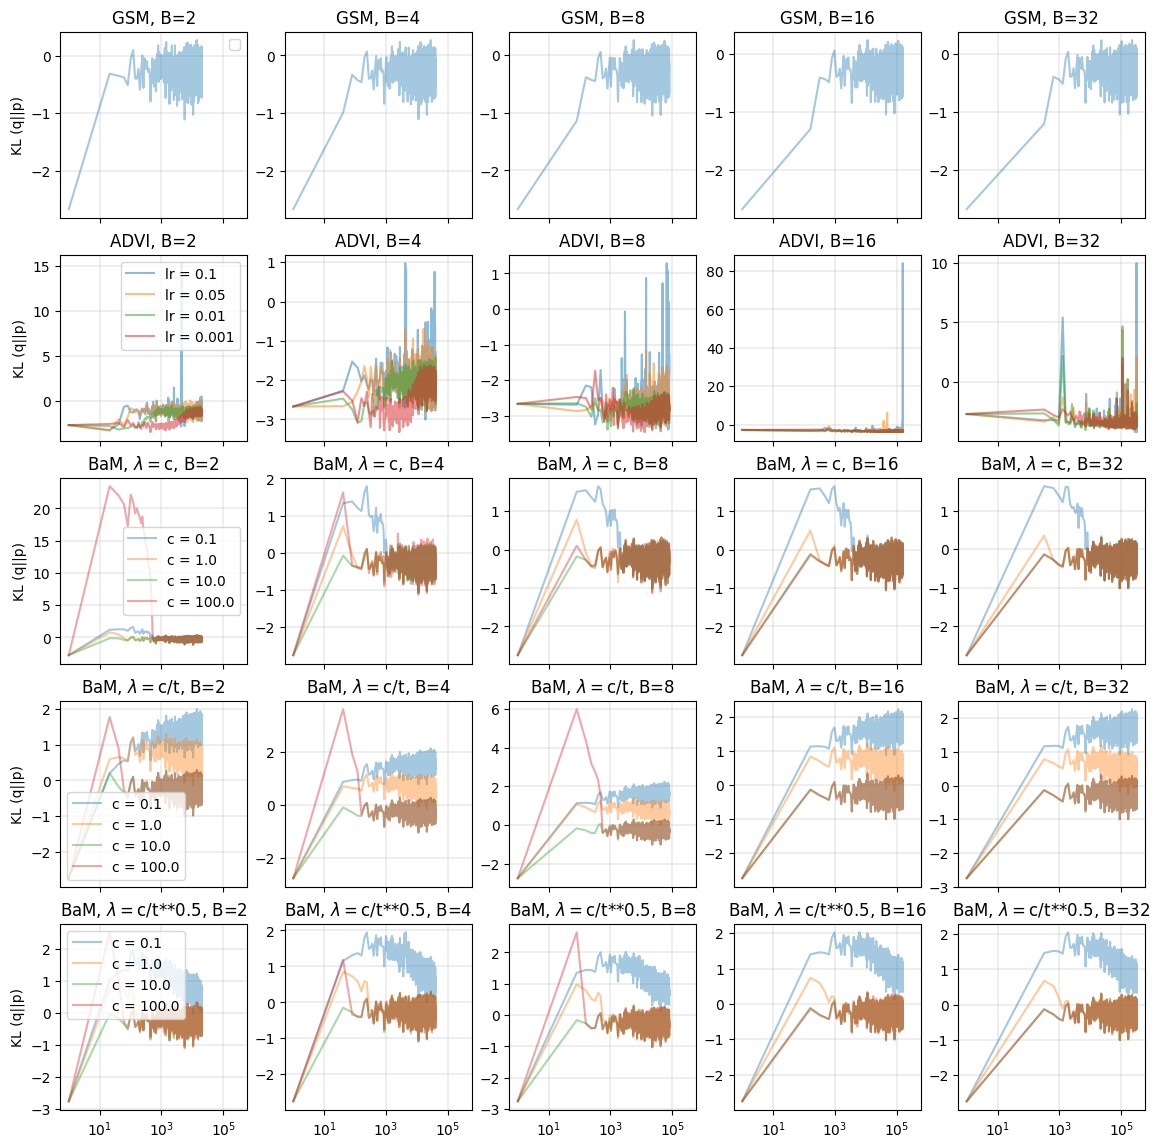

In [104]:
nmodel = 64
nseeds = 1
mode = 'fkl'
suffix = ''


for mode in ['fkl', 'rkl']:
    print(f'For model {mode}')
    fig, ax = plt.subplots(5, 5, figsize=(14, 14), sharex=True, sharey=False)

    batch = 2
    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[0, ib].set_title(f'GSM, B={batch}')
        for seed in range(nseeds):
            try:
                path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
                nevals =  np.load(path + 'nevals.npy')
                fkl =  np.load(path + 'fkl.npy')
                rkl =  np.load(path + 'rkl.npy')
                lbl = None
                if mode == 'fkl' : ax[0, ib].plot(nevals, fkl, f'C{0}', alpha=0.4, label=lbl)
                else : ax[0, ib].plot(nevals, rkl, f'C{0}', alpha=0.4, label=lbl)
            except Exception as e: print(e)


    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[1, ib].set_title(f'ADVI, B={batch}')
        for ilr, lr in enumerate([1e-1, 5e-2, 1e-2, 1e-3]):
            for seed in range(nseeds):
                try:
                    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
                    nevals =  np.load(path + 'nevals.npy')
                    fkl =  np.load(path + 'fkl.npy')
                    rkl =  np.load(path + 'rkl.npy')
                    lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
                    if mode == 'fkl' : ax[1, ib].plot(nevals, fkl, f'C{ilr}', alpha=0.5, label=lbl)
                    else : ax[1, ib].plot(nevals, rkl, f'C{ilr}', alpha=0.5, label=lbl)
                except Exception as e: print(e)

    #####
    lt = 0
    reg = 100
    seed = 0
    batch = 8

    for lt in [0, 1, 2]:
        for ib, batch in enumerate([2, 4, 8, 16, 32]):
            ax[2+lt, ib].set_title(f'BaM, {reglist[lt]}, B={batch}')
            for ir, reg in enumerate([0.1, 1., 10., 100.]):
                for seed in range(nseeds):
                    try:
                        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
                        nevals =  np.load(path + 'nevals.npy')
                        fkl =  np.load(path + 'fkl.npy')
                        rkl =  np.load(path + 'rkl.npy')
                        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
                        if mode == 'fkl' : ax[2+lt, ib].plot(nevals, fkl, f'C{ir}', alpha=0.4, label=lbl)
                        else: ax[2+lt, ib].plot(nevals, rkl, f'C{ir}', alpha=0.4, label=lbl)
                    except Exception as e: print(e)


    for axis in ax.flatten():
        # axis.loglog()
        axis.semilogx()
        axis.grid(which='both', lw=0.3)

    for axis in ax[:, 0]:
        axis.legend()
        if mode == 'fkl': axis.set_ylabel('KL (p||q)')
        elif mode == 'rkl': axis.set_ylabel('KL (q||p)')
    plt.show()

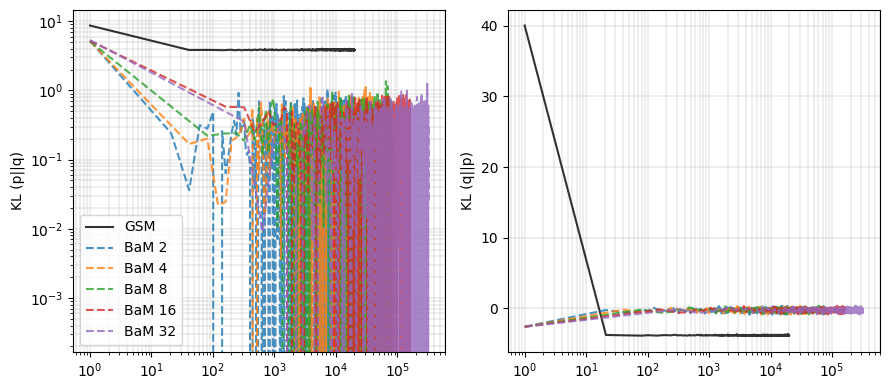

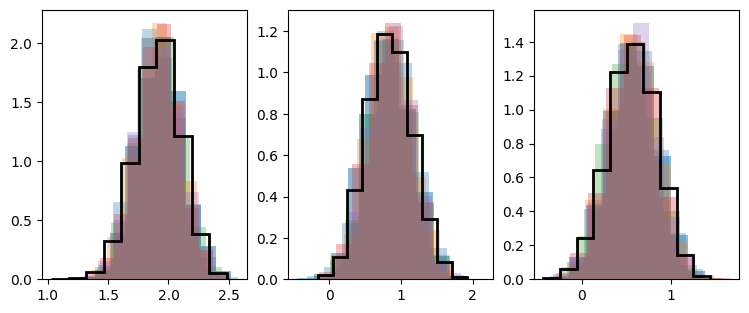

In [111]:
nmodel = 64
suffix = ''
nseeds = 2
seeds = [1]

fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=False)
lss = ['-', '--', ':', '-.']


ref_samples = np.load(f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/ref_samples.npy')
ndim = min(ref_samples.shape[1], 10)
fig2, ax2 = plt.subplots(1, ndim, figsize = (ndim*3, 3.5))
for i in range(ndim):
    ax2[i].hist(ref_samples[:, i], alpha=1., density=True, histtype='step', color='k', lw=2)



batch = 2
for seed in seeds:
    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
    nevals =  np.load(path + 'nevals.npy')
    fkl =  np.load(path + 'fkl.npy')
    rkl =  np.load(path + 'rkl.npy')
    lbl = None
    ax[0].plot(nevals, fkl, f'k', alpha=0.8, label='GSM')
    ax[1].plot(nevals, rkl, f'k', alpha=0.8, label=lbl)
    mean =  np.load(path + 'mean.npy')
    cov =  np.load(path + 'cov.npy')
    samples = np.random.multivariate_normal(mean, cov, 2000)
    for i in range(ndim):
        ax2[i].hist(samples[:, i], color='C0', alpha=0.5, density=True)


# batch = 8
# # for ilr, lr in enumerate([1e-2, 1e-3]):
# for ilr, lr in enumerate([5e-3]):
#     for seed in seeds:
#         path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
#         nevals =  np.load(path + 'nevals.npy')
#         fkl =  np.load(path + 'fkl.npy')
#         rkl =  np.load(path + 'rkl.npy')
#         lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
#         ax[0].plot(nevals, fkl, f'C1', alpha=0.5, label='ADVI')
#         ax[1].plot(nevals, rkl, f'C1', alpha=0.5, label=lbl)
#         mean =  np.load(path + 'mean.npy')
#         cov =  np.load(path + 'cov.npy')
#         samples = np.random.multivariate_normal(mean, cov, 2000)
#         for i in range(ndim):
#             ax2[i].hist(samples[:, i], color='C1', alpha=0.5, density=True)

# #####
lt = 0
reg = 100
seed = 0
batch = 64
lt = 1

# for batch in [2, 4, 8, 16, 32, 64, 128]:
for batch in [2, 4, 8, 16, 32]:
    for seed in seeds:
        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
        nevals =  np.load(path + 'nevals.npy')
        fkl =  np.load(path + 'fkl.npy')
        rkl =  np.load(path + 'rkl.npy')
        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
        ax[0].plot(nevals, fkl, ls=lss[lt], alpha=0.8, label=f'BaM {batch}')
        ax[1].plot(nevals, rkl, ls=lss[lt], alpha=0.8, label=lbl)
        mean =  np.load(path + 'mean.npy')
        cov =  np.load(path + 'cov.npy')
        samples = np.random.multivariate_normal(mean, cov, 2000)
        for i in range(ndim):
            ax2[i].hist(samples[:, i], alpha=0.3, density=True)

ax[0].semilogy()
# ax[1].semilogy()
ax[0].set_ylabel('KL (p||q)')
ax[1].set_ylabel('KL (q||p)')
ax[0].legend()
for axis in ax.flatten():
    # axis.loglog()
    axis.semilogx()
    axis.grid(which='both', lw=0.3)

fig.tight_layout()

# PDB 68 - gp_pois_regr - Non Gauss

For model fkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


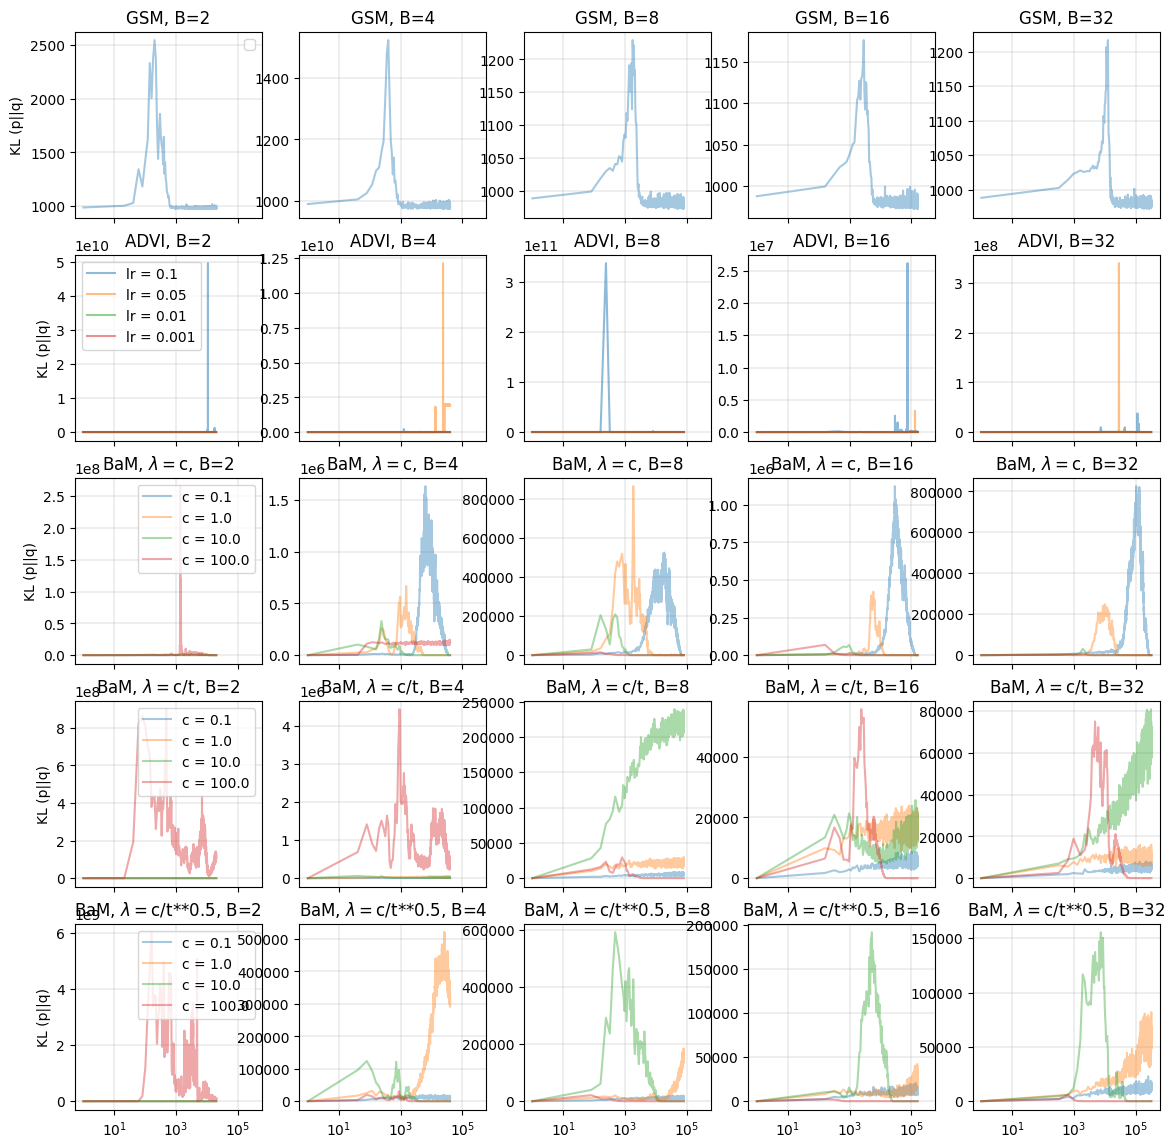

For model rkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


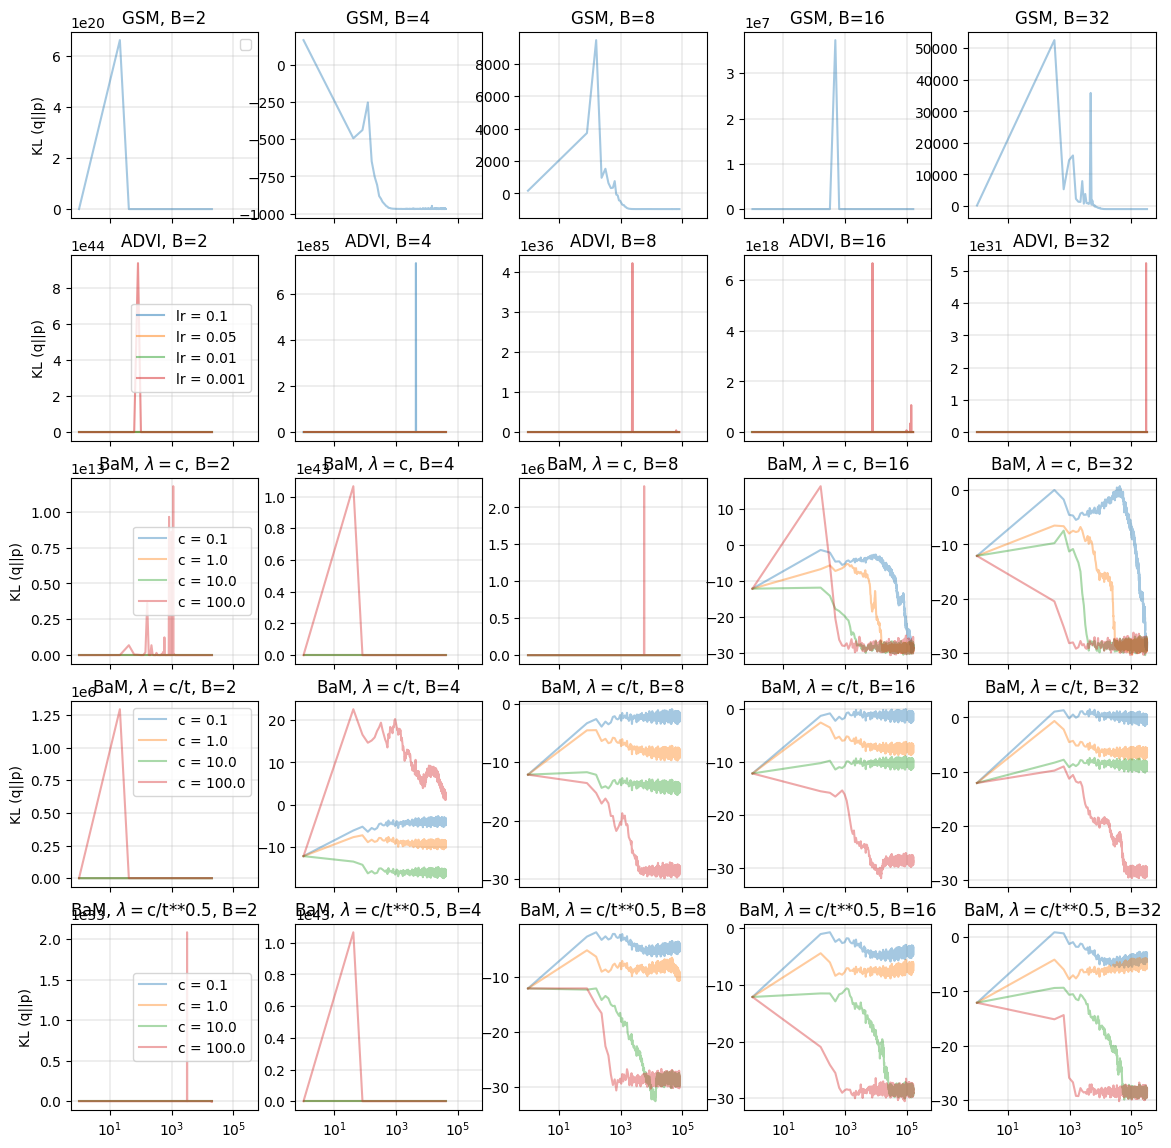

In [183]:
nmodel = 68
nseeds = 1
mode = 'fkl'
suffix = ''


for mode in ['fkl', 'rkl']:
    print(f'For model {mode}')
    fig, ax = plt.subplots(5, 5, figsize=(14, 14), sharex=True, sharey=False)

    batch = 2
    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[0, ib].set_title(f'GSM, B={batch}')
        for seed in range(nseeds):
            try:
                path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
                nevals =  np.load(path + 'nevals.npy')
                fkl =  np.load(path + 'fkl.npy')
                rkl =  np.load(path + 'rkl.npy')
                lbl = None
                if mode == 'fkl' : ax[0, ib].plot(nevals, fkl, f'C{0}', alpha=0.4, label=lbl)
                else : ax[0, ib].plot(nevals, rkl, f'C{0}', alpha=0.4, label=lbl)
            except Exception as e: print(e)


    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[1, ib].set_title(f'ADVI, B={batch}')
        for ilr, lr in enumerate([1e-1, 5e-2, 1e-2, 1e-3]):
            for seed in range(nseeds):
                try:
                    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
                    nevals =  np.load(path + 'nevals.npy')
                    fkl =  np.load(path + 'fkl.npy')
                    rkl =  np.load(path + 'rkl.npy')
                    lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
                    if mode == 'fkl' : ax[1, ib].plot(nevals, fkl, f'C{ilr}', alpha=0.5, label=lbl)
                    else : ax[1, ib].plot(nevals, rkl, f'C{ilr}', alpha=0.5, label=lbl)
                except Exception as e: print(e)

    #####
    lt = 0
    reg = 100
    seed = 0
    batch = 8

    for lt in [0, 1, 2]:
        for ib, batch in enumerate([2, 4, 8, 16, 32]):
            ax[2+lt, ib].set_title(f'BaM, {reglist[lt]}, B={batch}')
            for ir, reg in enumerate([0.1, 1., 10., 100.]):
                for seed in range(nseeds):
                    try:
                        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
                        nevals =  np.load(path + 'nevals.npy')
                        fkl =  np.load(path + 'fkl.npy')
                        rkl =  np.load(path + 'rkl.npy')
                        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
                        if mode == 'fkl' : ax[2+lt, ib].plot(nevals, fkl, f'C{ir}', alpha=0.4, label=lbl)
                        else: ax[2+lt, ib].plot(nevals, rkl, f'C{ir}', alpha=0.4, label=lbl)
                    except Exception as e: print(e)


    for axis in ax.flatten():
        # axis.loglog()
        axis.semilogx()
        axis.grid(which='both', lw=0.3)

    for axis in ax[:, 0]:
        axis.legend()
        if mode == 'fkl': axis.set_ylabel('KL (p||q)')
        elif mode == 'rkl': axis.set_ylabel('KL (q||p)')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/ls-gsm/PDB_68/lsgsm/B2-lambdat1-reg0.00-lbfgsinit/S1/nevals.npy'

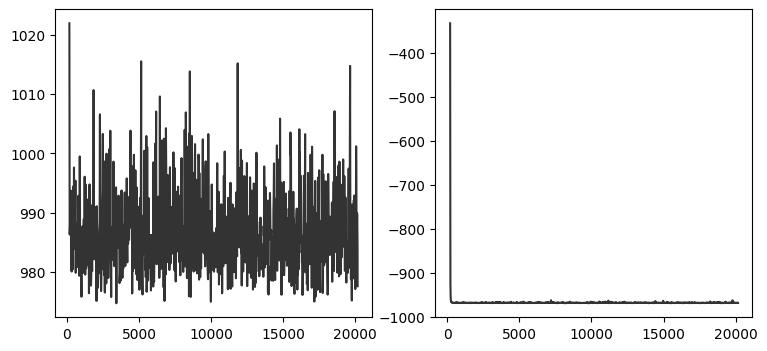

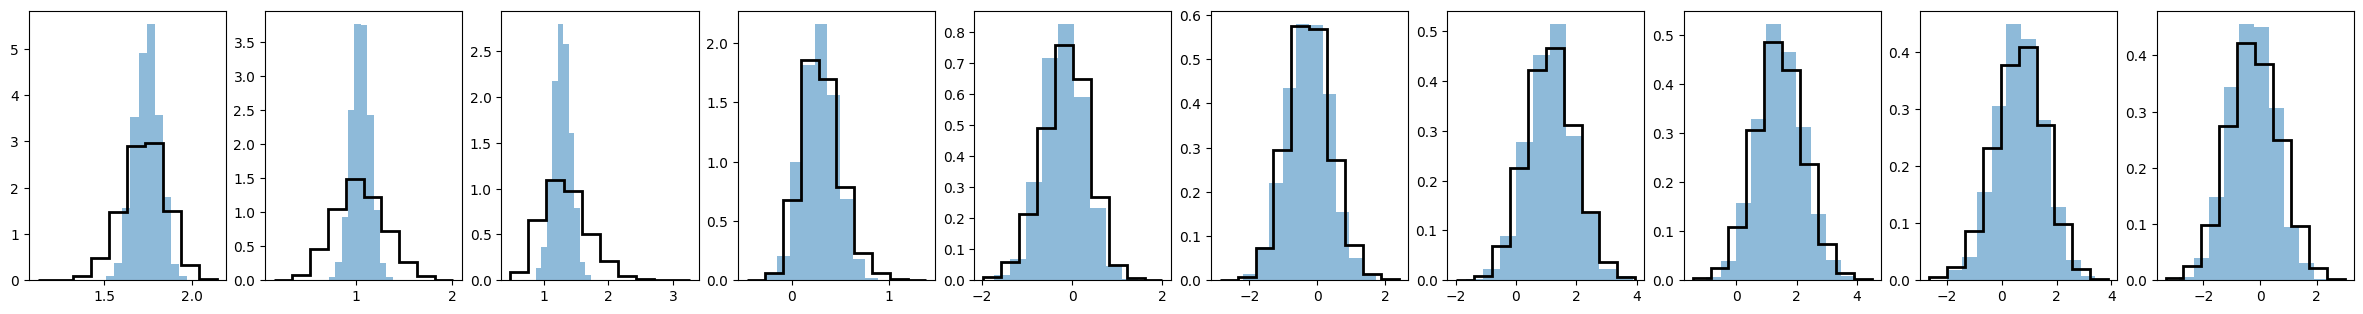

In [261]:
nmodel = 68
suffix = '-lbfgsinit'
nseeds = 2
seeds = [1]

fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=False)
lss = ['-', '--', ':', '-.']


ref_samples = np.load(f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/ref_samples.npy')
ndim = min(ref_samples.shape[1], 10)
fig2, ax2 = plt.subplots(1, ndim, figsize = (ndim*3, 3.5))
for i in range(ndim):
    ax2[i].hist(ref_samples[:, i], alpha=1., density=True, histtype='step', color='k', lw=2)



batch = 2
for seed in seeds:
    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
    nevals =  np.load(path + 'nevals.npy')
    fkl =  np.load(path + 'fkl.npy')
    rkl =  np.load(path + 'rkl.npy')
    lbl = None
    ax[0].plot(nevals, fkl, f'k', alpha=0.8, label='GSM')
    ax[1].plot(nevals, rkl, f'k', alpha=0.8, label=lbl)
    mean =  np.load(path + 'mean.npy')
    cov =  np.load(path + 'cov.npy')
    samples = np.random.multivariate_normal(mean, cov, 2000)
    for i in range(ndim):
        ax2[i].hist(samples[:, i], color='C0', alpha=0.5, density=True)


# bacth = 8
# # for ilr, lr in enumerate([1e-2, 1e-3]):
# for ilr, lr in enumerate([5e-3]):
#     for seed in seeds:
#         path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
#         nevals =  np.load(path + 'nevals.npy')
#         fkl =  np.load(path + 'fkl.npy')
#         rkl =  np.load(path + 'rkl.npy')
#         lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
#         ax[0].plot(nevals, fkl, f'C1', alpha=0.5, label='ADVI')
#         ax[1].plot(nevals, rkl, f'C1', alpha=0.5, label=lbl)
#         mean =  np.load(path + 'mean.npy')
#         cov =  np.load(path + 'cov.npy')
#         samples = np.random.multivariate_normal(mean, cov, 2000)
#         for i in range(ndim):
#             ax2[i].hist(samples[:, i], color='C1', alpha=0.5, density=True)

# #####
lt = 0
reg = 0
seed = 0
batch = 64
lt = 1

for batch in [2, 4, 8, 16, 32, 64, 128]:
# for batch in [2, 4, 8, 16, 32]:
    for seed in seeds:
        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
        nevals =  np.load(path + 'nevals.npy')
        fkl =  np.load(path + 'fkl.npy')
        rkl =  np.load(path + 'rkl.npy')
        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
        ax[0].plot(nevals, fkl, ls=lss[lt], alpha=0.8, label=f'BaM {batch}')
        ax[1].plot(nevals, rkl, ls=lss[lt], alpha=0.8, label=lbl)
        mean =  np.load(path + 'mean.npy')
        cov =  np.load(path + 'cov.npy')
        samples = np.random.multivariate_normal(mean, cov, 2000)
        for i in range(ndim):
            ax2[i].hist(samples[:, i], alpha=0.3, density=True)


ax[0].semilogy()
# ax[1].semilogy()
ax[0].set_ylabel('KL (p||q)')
ax[1].set_ylabel('KL (q||p)')
ax[0].legend()
for axis in ax.flatten():
    # axis.loglog()
    axis.semilogx()
    axis.grid(which='both', lw=0.3)

fig.tight_layout()

# PDB 85 - eight_schools_noncentered - non Gauss

For model fkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


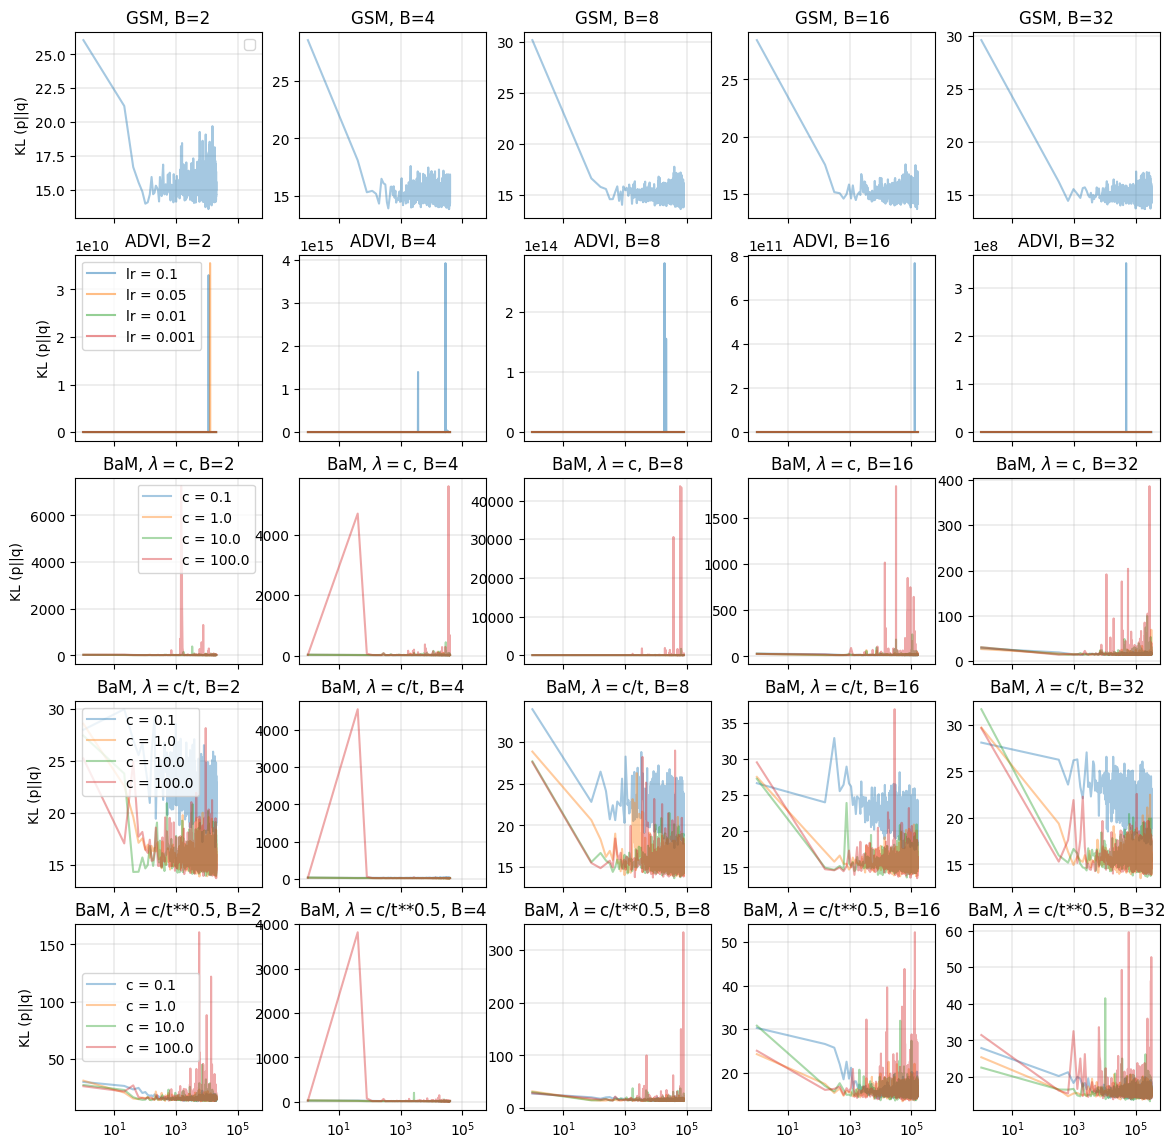

For model rkl


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


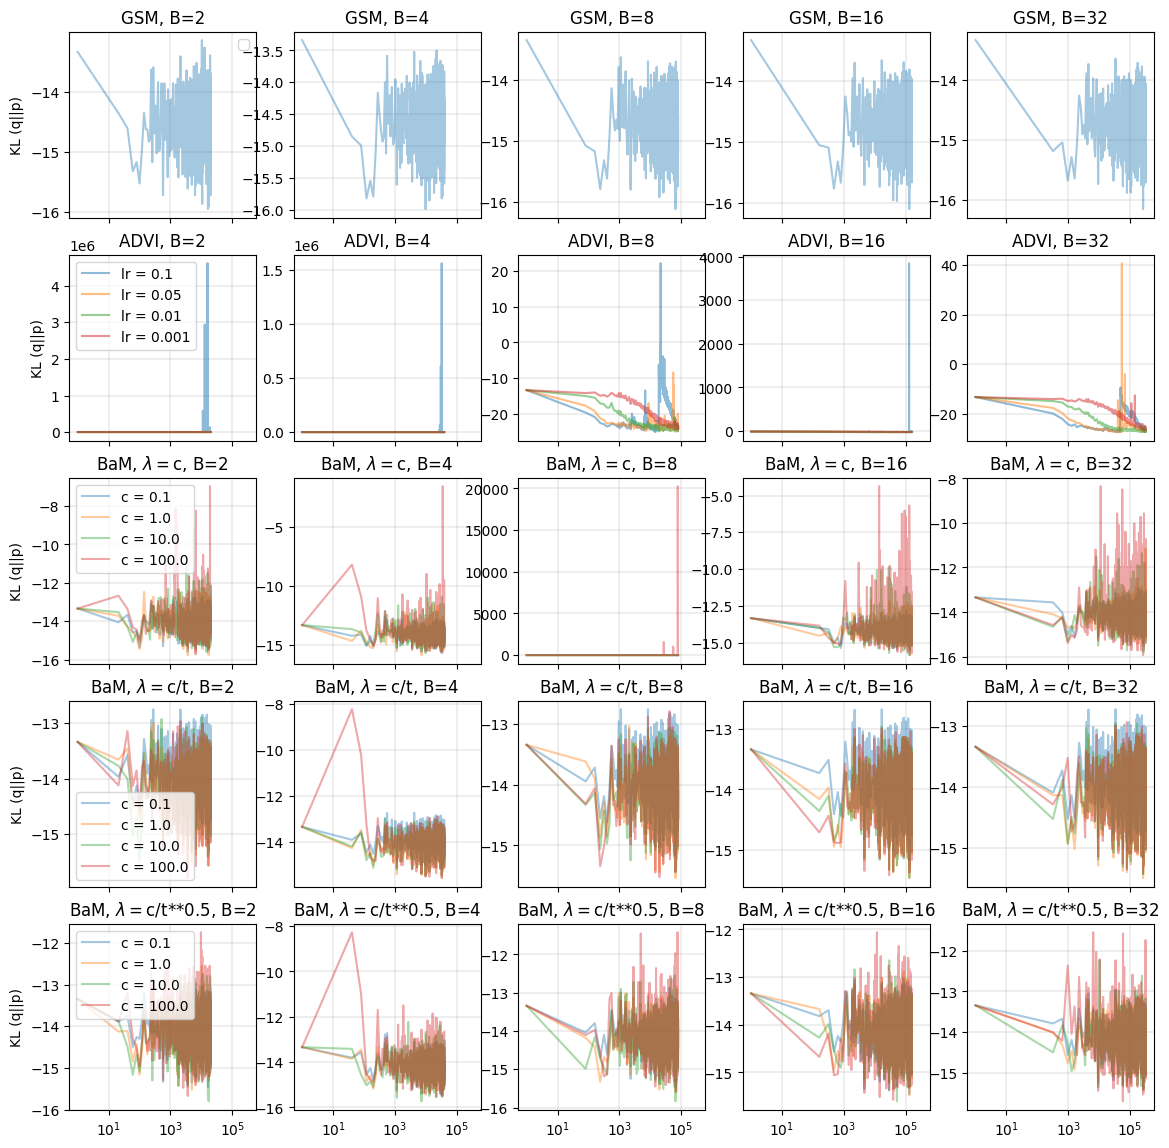

In [66]:
nmodel = 85
nseeds = 1
mode = 'fkl'
suffix = ''


for mode in ['fkl', 'rkl']:
    print(f'For model {mode}')
    fig, ax = plt.subplots(5, 5, figsize=(14, 14), sharex=True, sharey=False)

    batch = 2
    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[0, ib].set_title(f'GSM, B={batch}')
        for seed in range(nseeds):
            try:
                path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
                nevals =  np.load(path + 'nevals.npy')
                fkl =  np.load(path + 'fkl.npy')
                rkl =  np.load(path + 'rkl.npy')
                lbl = None
                if mode == 'fkl' : ax[0, ib].plot(nevals, fkl, f'C{0}', alpha=0.4, label=lbl)
                else : ax[0, ib].plot(nevals, rkl, f'C{0}', alpha=0.4, label=lbl)
            except Exception as e: print(e)


    for ib, batch in enumerate([2, 4, 8, 16, 32]):
        ax[1, ib].set_title(f'ADVI, B={batch}')
        for ilr, lr in enumerate([1e-1, 5e-2, 1e-2, 1e-3]):
            for seed in range(nseeds):
                try:
                    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
                    nevals =  np.load(path + 'nevals.npy')
                    fkl =  np.load(path + 'fkl.npy')
                    rkl =  np.load(path + 'rkl.npy')
                    lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
                    if mode == 'fkl' : ax[1, ib].plot(nevals, fkl, f'C{ilr}', alpha=0.5, label=lbl)
                    else : ax[1, ib].plot(nevals, rkl, f'C{ilr}', alpha=0.5, label=lbl)
                except Exception as e: print(e)

    #####
    lt = 0
    reg = 100
    seed = 0
    batch = 8

    for lt in [0, 1, 2]:
        for ib, batch in enumerate([2, 4, 8, 16, 32]):
            ax[2+lt, ib].set_title(f'BaM, {reglist[lt]}, B={batch}')
            for ir, reg in enumerate([0.1, 1., 10., 100.]):
                for seed in range(nseeds):
                    try:
                        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
                        nevals =  np.load(path + 'nevals.npy')
                        fkl =  np.load(path + 'fkl.npy')
                        rkl =  np.load(path + 'rkl.npy')
                        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
                        if mode == 'fkl' : ax[2+lt, ib].plot(nevals, fkl, f'C{ir}', alpha=0.4, label=lbl)
                        else: ax[2+lt, ib].plot(nevals, rkl, f'C{ir}', alpha=0.4, label=lbl)
                    except Exception as e: print(e)


    for axis in ax.flatten():
        # axis.loglog()
        axis.semilogx()
        axis.grid(which='both', lw=0.3)

    for axis in ax[:, 0]:
        axis.legend()
        if mode == 'fkl': axis.set_ylabel('KL (p||q)')
        elif mode == 'rkl': axis.set_ylabel('KL (q||p)')
    plt.show()

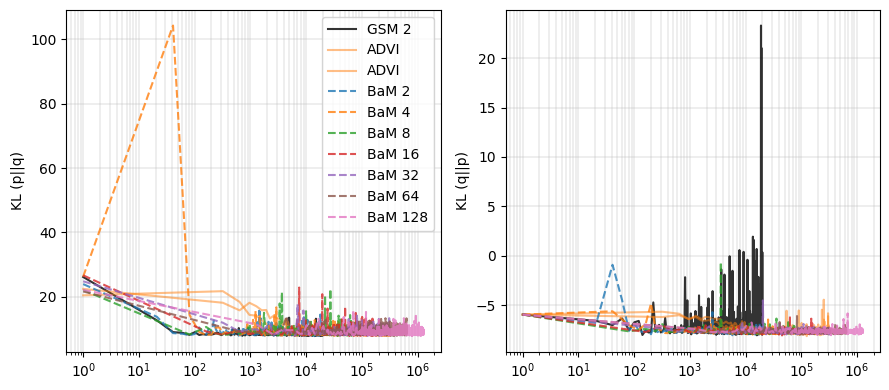

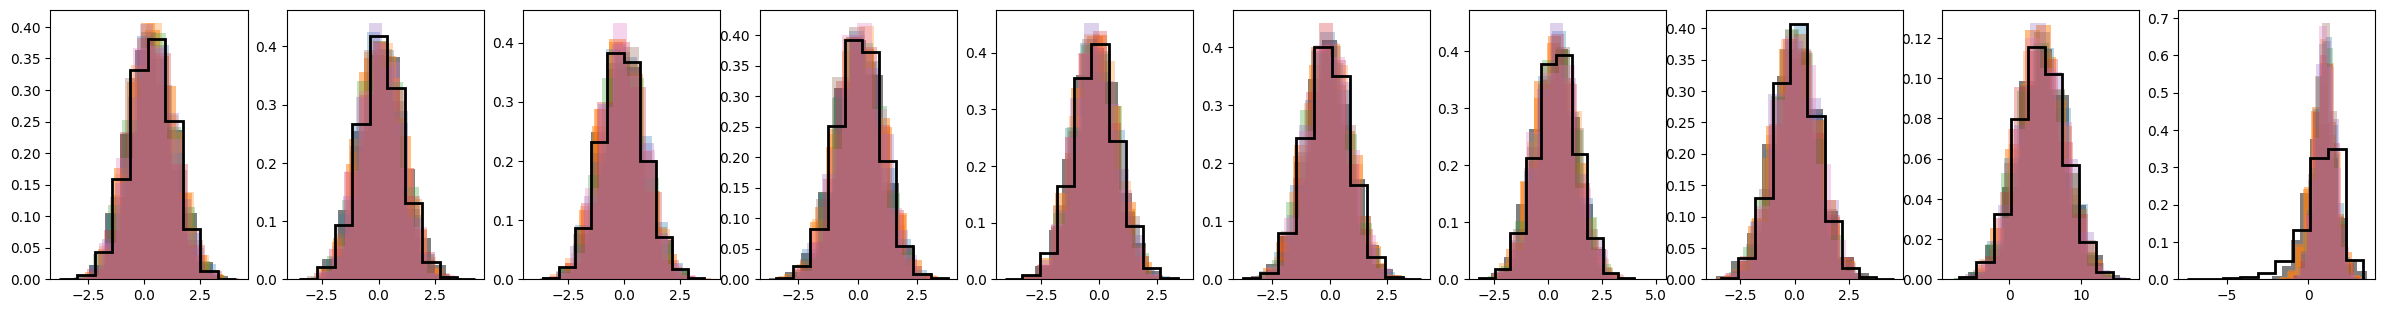

In [201]:
nmodel = 85
suffix = ''
nseeds = 2
seeds = [0]

fig, ax = plt.subplots(1, 2, figsize=(9, 4), sharex=True, sharey=False)
lss = ['-', '--', ':', '-.']


ref_samples = np.load(f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/ref_samples.npy')
ndim = min(ref_samples.shape[1], 10)
fig2, ax2 = plt.subplots(1, ndim, figsize = (ndim*3, 3.5))
for i in range(ndim):
    ax2[i].hist(ref_samples[:, i], alpha=1., density=True, histtype='step', color='k', lw=2)



batch = 2
for seed in seeds:
    path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
    nevals =  np.load(path + 'nevals.npy')
    fkl =  np.load(path + 'fkl.npy')
    rkl =  np.load(path + 'rkl.npy')
    lbl = None
    ax[0].plot(nevals, fkl, f'k', alpha=0.8, label=f'GSM {batch}')
    ax[1].plot(nevals, rkl, f'k', alpha=0.8, label=lbl)
    mean =  np.load(path + 'mean.npy')
    cov =  np.load(path + 'cov.npy')
    samples = np.random.multivariate_normal(mean, cov, 2000)
    for i in range(ndim):
        ax2[i].hist(samples[:, i], color='k', alpha=0.5, density=True)


batch = 32
# for ilr, lr in enumerate([1e-2, 1e-3]):
for ilr, lr in enumerate([1e-2, 5e-3]):
    for seed in seeds:
        path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
        nevals =  np.load(path + 'nevals.npy')
        fkl =  np.load(path + 'fkl.npy')
        rkl =  np.load(path + 'rkl.npy')
        lbl = f'lr = {lr}' if (seed == 0) & (ib==0)  else  ''
        ax[0].plot(nevals, fkl, f'C1', alpha=0.5, label='ADVI')
        ax[1].plot(nevals, rkl, f'C1', alpha=0.5, label=lbl)
        mean =  np.load(path + 'mean.npy')
        cov =  np.load(path + 'cov.npy')
        samples = np.random.multivariate_normal(mean, cov, 2000)
        for i in range(ndim):
            ax2[i].hist(samples[:, i], color='C1', alpha=0.5, density=True)

# #####
lt = 0
reg = 0
seed = 0
batch = 64
lt = 1

for batch in [2, 4, 8, 16, 32, 64, 128]:
# for batch in [2, 4, 8, 16, 32]:
    for seed in seeds:
        path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
        nevals =  np.load(path + 'nevals.npy')
        fkl =  np.load(path + 'fkl.npy')
        rkl =  np.load(path + 'rkl.npy')
        lbl = f'c = {reg}' if (seed == 0) & (ib == 0)  else  ''
        ax[0].plot(nevals, fkl, ls=lss[lt], alpha=0.8, label=f'BaM {batch}')
        ax[1].plot(nevals, rkl, ls=lss[lt], alpha=0.8, label=lbl)
        mean =  np.load(path + 'mean.npy')
        cov =  np.load(path + 'cov.npy')
        samples = np.random.multivariate_normal(mean, cov, 2000)
        for i in range(ndim):
            ax2[i].hist(samples[:, i], alpha=0.3, density=True)

            
# ax[0].semilogy()
# ax[1].semilogy()
ax[0].set_ylabel('KL (p||q)')
ax[1].set_ylabel('KL (q||p)')
ax[0].legend()
for axis in ax.flatten():
    # axis.loglog()
    axis.semilogx()
    axis.grid(which='both', lw=0.3)

fig.tight_layout()

# Summary

In [457]:

from numpyro.distributions import MultivariateNormal
import jax

@jit
def get_mu_std(m, c):
    samples = MultivariateNormal(m, c).sample(jax.random.PRNGKey(0), (10000,))
    return samples.mean(axis=0), samples.std(axis=0)



def plot_losses(ax, nmodel, alg, ref_samples=None, batch=2, seed=0, suffix='', 
                lr=1e-2, lambdat=1, reg=0, 
                c=None, lbl=None, ls="-", alpha=0.8):
    try:
        if alg == 'gsm' : path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/gsm/B{batch}{suffix}/S{seed}/'
        if alg == 'lsgsm': path = f'/mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/lsgsm/B{batch}-lambdat{lt}-reg{reg:0.2f}{suffix}/S{seed}/'
        if alg == 'advi' : path =         path = f'//mnt/ceph/users/cmodi/ls-gsm/PDB_{nmodel}/advi/B{batch}-lr{lr:0.3f}{suffix}/S{seed}/'
        nevals =  np.load(path + 'nevals.npy')
        fkl =  np.load(path + 'fkl.npy')
        rkl =  np.load(path + 'rkl.npy')
        # ax[0].plot( fkl, color=c, alpha=0.8, label=lbl, ls=ls)
        # ax[1].plot( rkl, color=c, alpha=0.8, label=lbl, ls=ls)
        ax[0].plot(nevals, fkl, color=c, alpha=alpha, label=lbl, ls=ls)
        ax[1].plot(nevals, rkl, color=c, alpha=alpha, label=lbl, ls=ls)
        i =  np.load(path + 'iparams.npy') + 1
        means =  np.load(path + 'means.npy')
        covs =  np.load(path + 'covs.npy')
        
        if ref_samples is not None:
            # rms = np.sum((means - ref_samples.mean(axis=0))**2, axis=1)**0.5
            # norm = (ref_samples.mean(axis=0)**2).sum()**0.5
            # mu, std = [], []
            # for j in range(len(means)):
            #     samples = np.random.multivariate_normal(means[j], covs[j], 2000)
            #     mu.append(samples.mean(axis=0))
            #     std.append(samples.std(axis=0))
            # mu, std = np.array(mu), np.array(std)

            mu, std = jax.vmap(test, in_axes=(0, 0))(means, covs)
            mu0, std0 = ref_samples.mean(axis=0), ref_samples.std(axis=0)
            rms = np.sum(((mu - mu0)/std0)**2, axis=1)**0.5
            ax[2].plot(nevals[::2], rms[:-1], color=c, alpha=alpha, label=lbl, ls=ls)
            rms = np.sum(((std - std0)/std0)**2, axis=1)**0.5
            ax[3].plot(nevals[::2], rms[:-1], color=c, alpha=alpha, label=lbl, ls=ls)
    except Exception as e:
        print(e)
    return path


1


Model name : Model_44
Model name : Model_31
Model name : Model_48
Model name : Model_68
Model name : Model_85


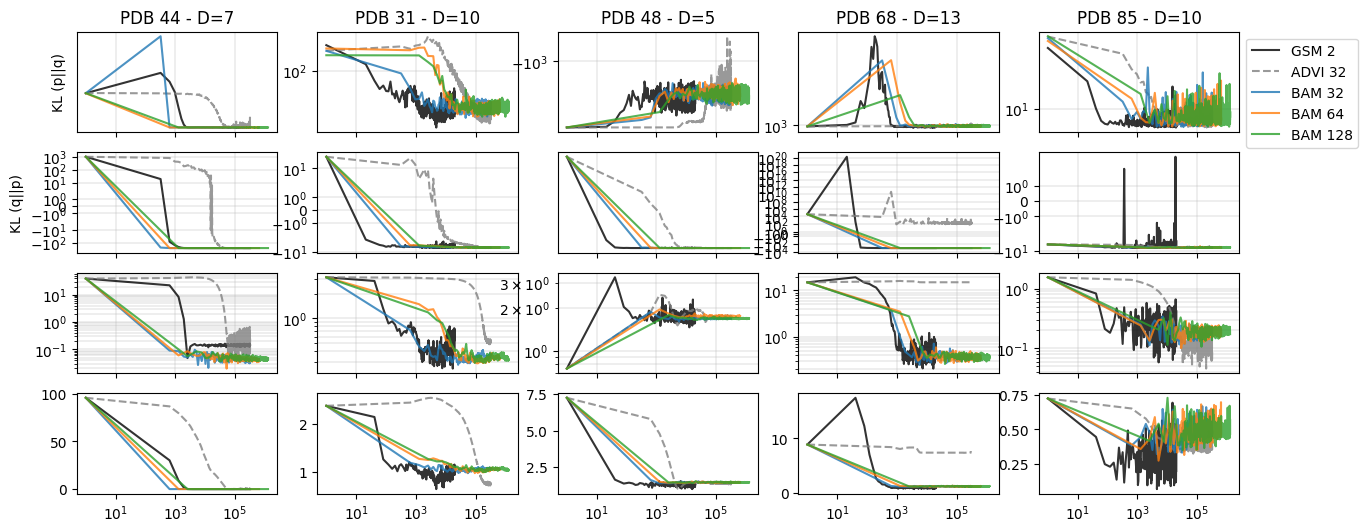

In [460]:
suffix = ''
# for lt in [0, 2, 1]:
for lt in [1]:

    print()
    print(lt)
    print()
    print()
    
    fig, ax = plt.subplots(4, 5, figsize=(15, 6), sharex=True, sharey=False)
    axt = ax.T
    lss = ['-', '--', ':', '-.']

    cg = 'k'
    ca = 'gray'
    # batches = [2, 4, 8, 16, 32, 64, 128]
    batches = [32, 64, 128]
    # batches = [8, 32, 128]

    #####
    nmodel = 44
    seed = 0
    axis = ax[:, 0]
    model, D, lpjaxsum, lp_g, ref_samples = setup_pdb(nmodel)
    axis[0].set_title(f'PDB {nmodel} - D={D}')
    
    batch = 32
    plot_losses(axis, nmodel, 'gsm', batch=batch, suffix=suffix, seed=seed, lbl=f'GSM {batch}', c=cg, ref_samples=ref_samples)
    # batch = 32
    # plot_losses(axis, nmodel, 'gsm', batch=batch, suffix=suffix, seed=seed, lbl=f'GSM {batch}', c=cg, ls="--")

    batch = 32
    lr = 1e-2
    plot_losses(axis, nmodel, 'advi', batch=batch, lr=lr, suffix=suffix, seed=seed, lbl=f'ADVI {batch}', c=ca, ls="--", ref_samples=ref_samples)

    lambdat = lt
    reg = 0 
    for batch in batches:
        plot_losses(axis, nmodel, 'lsgsm', batch=batch, suffix=suffix, seed=seed, lbl=f'BAM {batch}', ref_samples=ref_samples)


    #####
    nmodel = 31
    seed = 0 
    axis = ax[:, 1]
    model, D, lpjaxsum, lp_g, ref_samples = setup_pdb(nmodel)
    axis[0].set_title(f'PDB {nmodel} - D={D}')
    
    batch = 2
    plot_losses(axis, nmodel, 'gsm', batch=batch, suffix=suffix, seed=seed, lbl=f'GSM {batch}', c=cg, ref_samples=ref_samples)

    batch = 32
    lr = 1e-2
    plot_losses(axis, nmodel, 'advi', batch=batch, lr=lr, suffix=suffix, seed=seed, lbl=f'ADVI {batch}', c=ca, ls="--", ref_samples=ref_samples)

    lambdat = lt
    reg = 0 
    for batch in batches:
        plot_losses(axis, nmodel, 'lsgsm', batch=batch, suffix=suffix, seed=seed, lbl=f'BAM {batch}', ref_samples=ref_samples)


    #####
    nmodel = 48
    seed = 0 
    axis = ax[:, 2]
    model, D, lpjaxsum, lp_g, ref_samples = setup_pdb(nmodel)
    axis[0].set_title(f'PDB {nmodel} - D={D}')
    
    batch = 2
    plot_losses(axis, nmodel, 'gsm', batch=batch, suffix=suffix, seed=seed, lbl=f'GSM {batch}', c=cg, ref_samples=ref_samples)

    batch = 32
    lr = 1e-2
    plot_losses(axis, nmodel, 'advi', batch=batch, lr=lr, suffix=suffix, seed=seed, lbl=f'ADVI {batch}', c=ca, ls="--", ref_samples=ref_samples)

    lambdat = lt
    reg = 0 
    for batch in batches:
        plot_losses(axis, nmodel, 'lsgsm', batch=batch, suffix=suffix, seed=seed, lbl=f'BAM {batch}', ref_samples=ref_samples)


    #####
    nmodel = 68
    seed = 0 
    axis = ax[:, 3]
    model, D, lpjaxsum, lp_g, ref_samples = setup_pdb(nmodel)
    axis[0].set_title(f'PDB {nmodel} - D={D}')
    
    batch = 2
    plot_losses(axis, nmodel, 'gsm', batch=batch, suffix=suffix, seed=seed, lbl=f'GSM {batch}', c=cg, ref_samples=ref_samples)

    batch = 32
    lr = 1e-2
    plot_losses(axis, nmodel, 'advi', batch=batch, lr=lr, suffix=suffix, seed=seed, lbl=f'ADVI {batch}', c=ca, ls="--", ref_samples=ref_samples)

    lambdat = lt
    reg = 0 
    for batch in batches:
        plot_losses(axis, nmodel, 'lsgsm', batch=batch, suffix=suffix, seed=seed, lbl=f'BAM {batch}', ref_samples=ref_samples)



    #####
    nmodel = 85
    seed = 0 
    axis = ax[:, 4]
    model, D, lpjaxsum, lp_g, ref_samples = setup_pdb(nmodel)
    axis[0].set_title(f'PDB {nmodel} - D={D}')
    
    batch = 2
    plot_losses(axis, nmodel, 'gsm', batch=batch, suffix=suffix, seed=seed, lbl=f'GSM {batch}', c=cg, ref_samples=ref_samples)

    batch = 32
    lr = 1e-2
    plot_losses(axis, nmodel, 'advi', batch=batch, lr=lr, suffix=suffix, seed=seed, lbl=f'ADVI {batch}', c=ca, ls="--", ref_samples=ref_samples)

    lambdat = lt
    reg = 0 
    # for batch in [2, 8, 32, 128]:
    for batch in batches:
        plot_losses(axis, nmodel, 'lsgsm', batch=batch, suffix=suffix, seed=seed, lbl=f'BAM {batch}', ref_samples=ref_samples)


    ax[0, 0].set_ylabel('KL (p||q)')
    ax[1, 0].set_ylabel('KL (q||p)')
    ax[0, 4].legend(bbox_to_anchor=(1,1))
    for axis in ax[:2].flatten():
        axis.semilogx()
        # axis.set_xlim(0, 2000)
        axis.set_yscale('symlog')
        axis.grid(which='both', lw=0.3)
        # plot_losses(axt[0], 85, 'gsm', batch=2, suffix='', seed=0)

    for axis in ax[2].flatten():
        axis.semilogx()
        # axis.set_xlim(0, 2000)
        axis.set_yscale('log')
        axis.grid(which='both', lw=0.3)
        # plot_losses(axt[0], 85, 'gsm', batch=2, suffix='', seed=0)

    
    plt.show()


1
Model name : Model_44
Model name : Model_31
Model name : Model_48
Model name : Model_68
Model name : Model_85


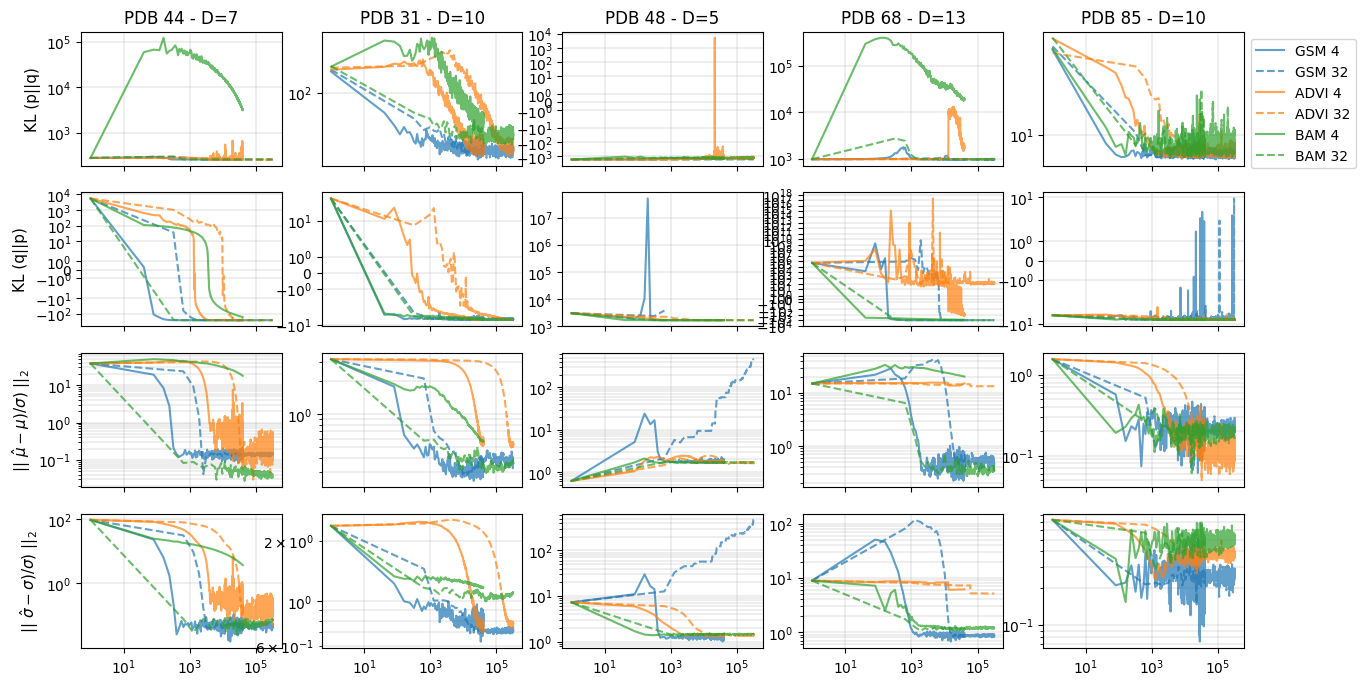

In [472]:
suffix = ''

models = [44, 31, 48, 68, 85]

for lt in [1]:

    print()
    print(lt)
    
    fig, ax = plt.subplots(4, 5, figsize=(15, 8), sharex=True, sharey=False)
    axt = ax.T
    lss = ['-', '--', ':', '-.']

    cg = 'k'
    ca = 'gray'
    # batches = [2, 4, 8, 16, 32, 64, 128]
    batches = [4, 32]
    # batches = [8, 32, 128]

    #####
    for i, nmodel in enumerate(models):
        seed = 1
        axis = ax[:, i]
        model, D, lpjaxsum, lp_g, ref_samples = setup_pdb(nmodel)
        axis[0].set_title(f'PDB {nmodel} - D={D}')

        for ib, batch in enumerate(batches):
            plot_losses(axis, nmodel, 'gsm', batch=batch, suffix=suffix, seed=seed, lbl=f'GSM {batch}', c='C0', ref_samples=ref_samples, alpha=0.7, ls=lss[ib])
        

        for ib, batch in enumerate(batches):
            plot_losses(axis, nmodel, 'advi', batch=batch, suffix=suffix, seed=seed, lbl=f'ADVI {batch}', c='C1', ref_samples=ref_samples, alpha=0.7, ls=lss[ib], lr=lr)
        
        # batch = 32
        # lr = 1e-2
        # plot_losses(axis, nmodel, 'advi', batch=batch, lr=lr, suffix=suffix, seed=seed, lbl=f'ADVI {batch}', c=ca, ls="--", ref_samples=ref_samples)

        lambdat = lt
        reg = 0 
        for ib, batch in enumerate(batches):
            plot_losses(axis, nmodel, 'lsgsm', batch=batch, suffix=suffix, seed=seed, lbl=f'BAM {batch}', c='C2', ref_samples=ref_samples, alpha=0.7, ls=lss[ib], lambdat=lambdat, reg=reg)



    ax[0, 0].set_ylabel('KL (p||q)', fontsize=11)
    ax[1, 0].set_ylabel('KL (q||p)', fontsize=11)
    # ax[2, 0].set_ylabel('|| $\mu_{VI} - \mu_{HMC})/\sigma_{HMC}$) ||$_2$')
    ax[2, 0].set_ylabel('|| $\hat{\mu} - \mu)/\sigma$) ||$_2$', fontsize=11)
    ax[3, 0].set_ylabel('|| $\hat{\sigma} - \sigma)/\sigma$) ||$_2$', fontsize=11)
    ax[0, 4].legend(bbox_to_anchor=(1,1))
    for axis in ax[:2].flatten():
        axis.semilogx()
        # axis.set_xlim(0, 2000)
        axis.set_yscale('symlog')
        axis.grid(which='both', lw=0.3)

    for axis in ax[2:].flatten():
        axis.semilogx()
        # axis.set_xlim(0, 2000)
        axis.set_yscale('log')
        axis.grid(which='both', lw=0.3)

    
    plt.show()


1
Model name : Model_44
Model name : Model_31
Model name : Model_48
Model name : Model_68
Model name : Model_85


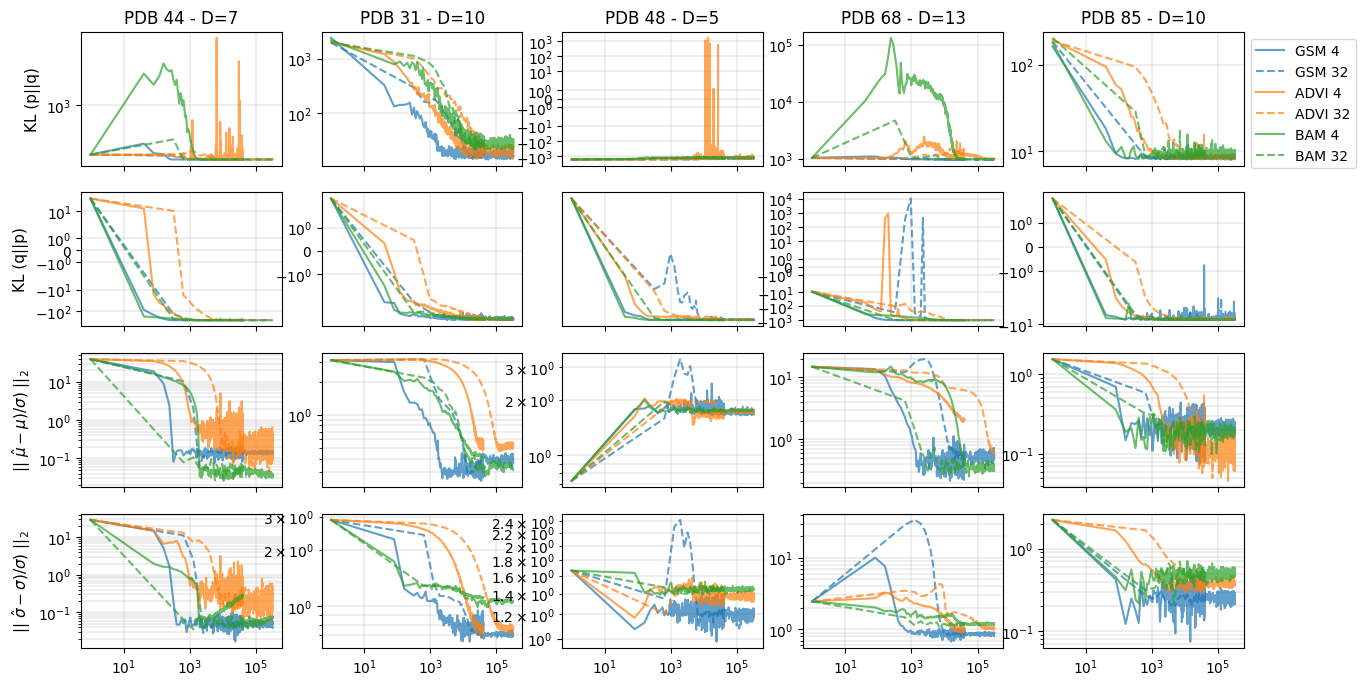

In [477]:
suffix = '-scaleinit0.10'

models = [44, 31, 48, 68, 85]

for lt in [1]:

    print()
    print(lt)
    
    fig, ax = plt.subplots(4, 5, figsize=(15, 8), sharex=True, sharey=False)
    axt = ax.T
    lss = ['-', '--', ':', '-.']

    cg = 'k'
    ca = 'gray'
    # batches = [2, 4, 8, 16, 32, 64, 128]
    batches = [4, 32]
    # batches = [8, 32, 128]

    #####
    for i, nmodel in enumerate(models):
        seed = 0
        axis = ax[:, i]
        model, D, lpjaxsum, lp_g, ref_samples = setup_pdb(nmodel)
        axis[0].set_title(f'PDB {nmodel} - D={D}')

        for ib, batch in enumerate(batches):
            plot_losses(axis, nmodel, 'gsm', batch=batch, suffix=suffix, seed=seed, lbl=f'GSM {batch}', c='C0', ref_samples=ref_samples, alpha=0.7, ls=lss[ib])
        
        lr = 1e-2
        for ib, batch in enumerate(batches):
            plot_losses(axis, nmodel, 'advi', batch=batch, suffix=suffix, seed=seed, lbl=f'ADVI {batch}', c='C1', ref_samples=ref_samples, alpha=0.7, ls=lss[ib], lr=lr)
        
        # batch = 32
        # lr = 1e-2
        # plot_losses(axis, nmodel, 'advi', batch=batch, lr=lr, suffix=suffix, seed=seed, lbl=f'ADVI {batch}', c=ca, ls="--", ref_samples=ref_samples)

        lambdat = lt
        reg = 0 
        for ib, batch in enumerate(batches):
            plot_losses(axis, nmodel, 'lsgsm', batch=batch, suffix=suffix, seed=seed, lbl=f'BAM {batch}', c='C2', ref_samples=ref_samples, alpha=0.7, ls=lss[ib], lambdat=lambdat, reg=reg)



    ax[0, 0].set_ylabel('KL (p||q)', fontsize=11)
    ax[1, 0].set_ylabel('KL (q||p)', fontsize=11)
    # ax[2, 0].set_ylabel('|| $\mu_{VI} - \mu_{HMC})/\sigma_{HMC}$) ||$_2$')
    ax[2, 0].set_ylabel('|| $\hat{\mu} - \mu)/\sigma$) ||$_2$', fontsize=11)
    ax[3, 0].set_ylabel('|| $\hat{\sigma} - \sigma)/\sigma$) ||$_2$', fontsize=11)
    ax[0, 4].legend(bbox_to_anchor=(1,1))
    for axis in ax[:2].flatten():
        axis.semilogx()
        # axis.set_xlim(0, 2000)
        axis.set_yscale('symlog')
        axis.grid(which='both', lw=0.3)

    for axis in ax[2:].flatten():
        axis.semilogx()
        # axis.set_xlim(0, 2000)
        axis.set_yscale('log')
        axis.grid(which='both', lw=0.3)

    
    plt.show()